# Project Proposal (Matt)

Group Project 1 involved choosing a dataset from an external source, using Python to process the data, and performing analysis based on generated visualizations. The members of the group are Sedra Kurdi, Myles Bridges, Natalie Myers, and Matthew Kennedy. The dataset chosen contained information regarding 2019 New York City Airbnb properties, which was found at https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/downloads/new-york-city-airbnb-open-data.zip/3. The approach was to clean the data, and then process and analyze it at the city, borough, and neighborhood levels. Parameters identified for consideration included property type, price, availability for booking, minimum night requirement, and number of reviews.

# Project Code (All)

In [192]:
#Import Modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [14, 10]

## Data Import and Cleaning (Matt)

In [193]:
#Find Current Path & List of Files/Folders in Current Path
current_path = os.getcwd()
current_directory = os.listdir()

#Loop Through List of Files/Folders in Current Path
for item in current_directory:
    
    #Set Condtion for Folder Containing Airbnb Data
    if item.lower().find('airbnb') >= 0 and item.lower().find('ipynb') == -1:

        #Loop Through List of Files/Folders in Airbnb Data Folder
        for data in os.listdir(os.path.join(current_path, item)):
            
            #Set Condition for AirBnb Data CSV File
            if data.lower().find('nyc') >= 0 and data.lower().find('csv') >= 0:

                #Define Path Variable for Airbnb Data CSV File
                input_file = os.path.join(current_path, item, data)
        
    #Set Condition for Folder for Output Result Plot Images
    elif item.lower().find('images') >= 0:
            
        #Define Path Variable for Output Results Folder
        output_path = os.path.join(current_path, item)

In [194]:
#Import Raw Data from CSV File
raw_data = pd.read_csv(input_file)

raw_data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [195]:
#Clean Raw Data by Dropping Rows with Missing Information
cleaned_data = raw_data.dropna().reset_index(drop = True)

cleaned_data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
5,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
6,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
7,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
8,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188
9,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6


In [196]:
#Clean Raw Data by Dropping Rows with Incorrect Information
cleaned_data = cleaned_data[cleaned_data['latitude'] >= -90]
cleaned_data = cleaned_data[cleaned_data['latitude'] <= 90]
cleaned_data = cleaned_data[cleaned_data['longitude'] >= -180]
cleaned_data = cleaned_data[cleaned_data['longitude'] <= 180]
cleaned_data = cleaned_data[cleaned_data['price'] > 0]
cleaned_data = cleaned_data[cleaned_data['availability_365'] <= 365]

cleaned_data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
5,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
6,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
7,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
8,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188
9,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6


## Data Processing and Analysis (Myles/Natalie/Sedra)

### NYC Complete Data (Sedra)

In [197]:
#How many properties of each type are listed?
room_type_data = {
    "Room Type":['Entire home/apt', 'Private Room', 'Shared Room'],
    "Count":[20320, 17647, 844]}
room_type_data_DF = pd.DataFrame(room_type_data)
room_type_data_DF

,Room Type,Count
0,Entire home/apt,20320
1,Private Room,17647
2,Shared Room,844


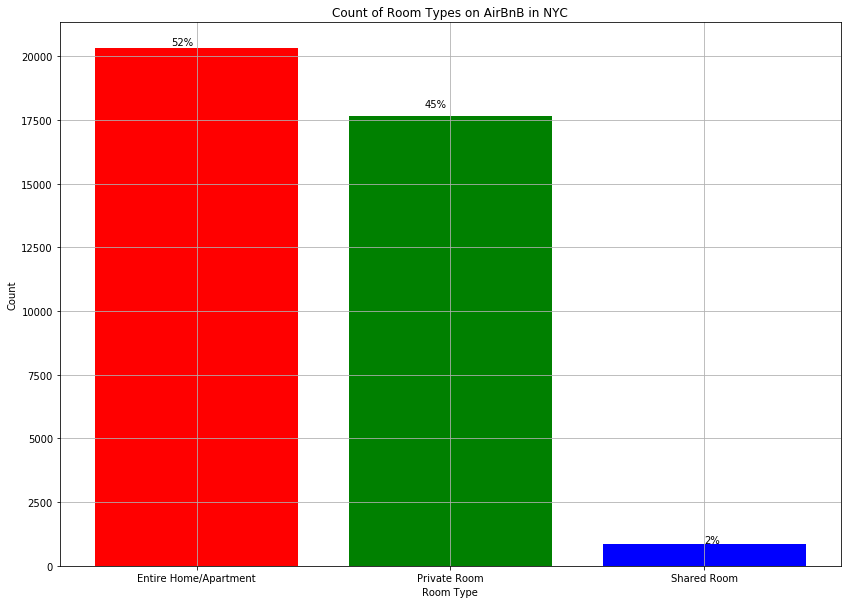

In [198]:
plt.bar(np.arange(0,3),room_type_data_DF['Count'], color=['red', 'green', 'blue'])
plt.title("Count of Room Types on AirBnB in NYC")
x_axis = np.arange(len(room_type_data_DF))
ticks = [value for value in x_axis]
plt.xticks(ticks, ["Entire Home/Apartment", "Private Room", "Shared Room"])
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.annotate("52%", xy=(-.1,20450))
plt.annotate("45%", xy=(.9, 18000))
plt.annotate("2%", xy=(2, 900))
plt.grid()
plt.savefig(os.path.join(output_path,'NYC_Property_Type_Count.png'))
plt.show()

In [199]:
#How many unique hosts are present for each type of property?
host_id_data = cleaned_data.groupby('room_type').host_id.nunique()
host_id_df = pd.DataFrame(host_id_data)
host_id_df

,host_id
room_type,
Entire home/apt,17720
Private room,13122
Shared room,554


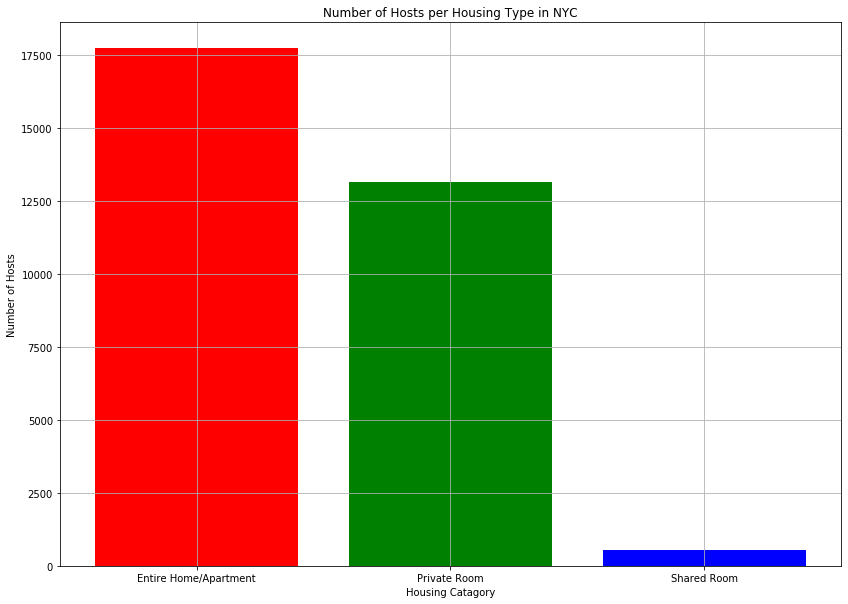

In [200]:
plt.bar(np.arange(0,3),host_id_df['host_id'], color=['red', 'green', 'blue'])
plt.title("Number of Hosts per Housing Type in NYC")
x_axis = np.arange(len(room_type_data_DF))
ticks = [value for value in x_axis]
plt.xticks(ticks, ["Entire Home/Apartment", "Private Room", "Shared Room"])
plt.xlabel("Housing Catagory")
plt.ylabel("Number of Hosts")
plt.grid()
plt.savefig(os.path.join(output_path, 'NYC_Unique_Host_Count.png'))
plt.show()

### NYC Borough Data (Myles/Sedra)

In [201]:
#What is the average price for each type of property in each borough?
avgprice_1 = cleaned_data[["neighbourhood_group", "room_type", "price"]]
avgprice_2 = avgprice_1.groupby(['neighbourhood_group', 'room_type'])
avgprice_3 = avgprice_2.mean()
avgprice_3.round()

price
neighbourhood_group room_type             
Bronx               Entire home/apt  121.0
                    Private room      57.0
                    Shared room       57.0
Brooklyn            Entire home/apt  171.0
                    Private room      73.0
                    Shared room       46.0
Manhattan           Entire home/apt  230.0
                    Private room     107.0
                    Shared room       78.0
Queens              Entire home/apt  139.0
                    Private room      69.0
                    Shared room       64.0
Staten Island       Entire home/apt  125.0
                    Private room      58.0
                    Shared room       58.0

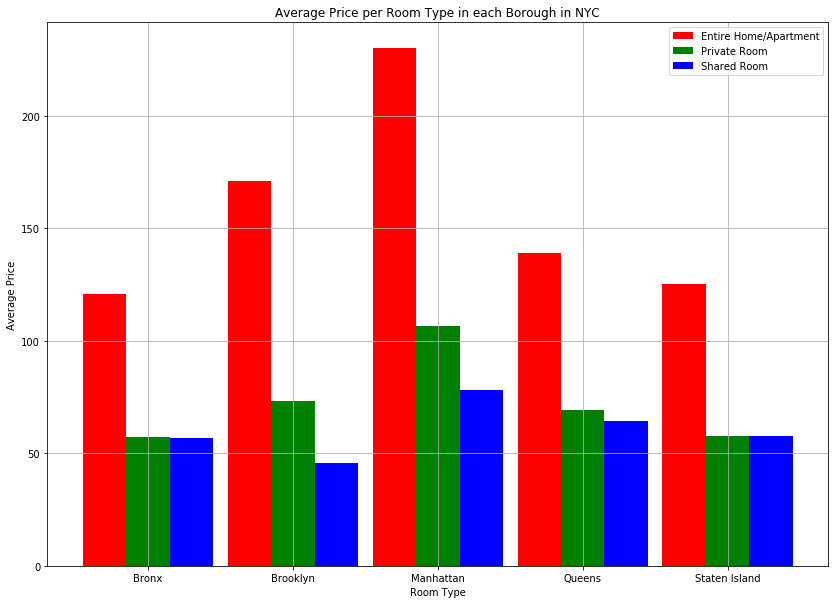

In [202]:
avgprice_entire = [avgprice_3['price'][0], avgprice_3['price'][3],
                    avgprice_3['price'][6], avgprice_3['price'][9],
                    avgprice_3['price'][12]]
avgprice_private = [avgprice_3['price'][1], avgprice_3['price'][4],
                    avgprice_3['price'][7],avgprice_3['price'][10],
                    avgprice_3['price'][13]]
avgprice_shared = [avgprice_3['price'][2], avgprice_3['price'][5],
                    avgprice_3['price'][8], avgprice_3['price'][11],
                    avgprice_3['price'][14]]
Legend = ["Entire Home/Apartment", "Private Room", "Shared Room"]
plt.bar(np.arange(1, 6) - 0.3, avgprice_entire, width = 0.3, color='red')
plt.bar(np.arange(1, 6), avgprice_private, width = 0.3, color='Green')
plt.bar(np.arange(1, 6) + 0.3, avgprice_shared, width = 0.3, color='blue')
plt.title("Average Price per Room Type in each Borough in NYC")
plt.ylabel("Average Price")
plt.xlabel("Room Type")
ticks = [1, 2, 3, 4, 5]
plt.xticks(ticks, ["Bronx", "Brooklyn", "Manhattan", "Queens", "Staten Island"])
plt.legend(Legend)
plt.savefig(os.path.join(output_path, 'NYC_Borough_Room_Type_Average_Price.png'))
plt.grid()

In [203]:
each_borough_df = cleaned_data[["neighbourhood_group","name","room_type"]]
each_borough_df.head()

,neighbourhood_group,name,room_type
0,Brooklyn,Clean & quiet apt home by the park,Private room
1,Manhattan,Skylit Midtown Castle,Entire home/apt
2,Brooklyn,Cozy Entire Floor of Brownstone,Entire home/apt
3,Manhattan,Entire Apt: Spacious Studio/Loft by central park,Entire home/apt
4,Manhattan,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt


In [204]:
#Show totals for each room type by borough
gb_borough = each_borough_df.groupby(['neighbourhood_group','room_type'])
RT_NG = gb_borough.count()
RT_NG

name
neighbourhood_group room_type            
Bronx               Entire home/apt   308
                    Private room      523
                    Shared room        43
Brooklyn            Entire home/apt  8158
                    Private room     7984
                    Shared room       288
Manhattan           Entire home/apt  9962
                    Private room     6303
                    Shared room       356
Queens              Entire home/apt  1742
                    Private room     2678
                    Shared room       152
Staten Island       Entire home/apt   150
                    Private room      159
                    Shared room         5

In [205]:
#Next sction will show Pecentage of each room type per borough

Bx = RT_NG.loc['Bronx']
Bx 
Bx['Pct of Group'] = Bx['name']/Bx['name'].sum()*100
Bx.round(2)

,name,Pct of Group
room_type,,
Entire home/apt,308,35.24
Private room,523,59.84
Shared room,43,4.92


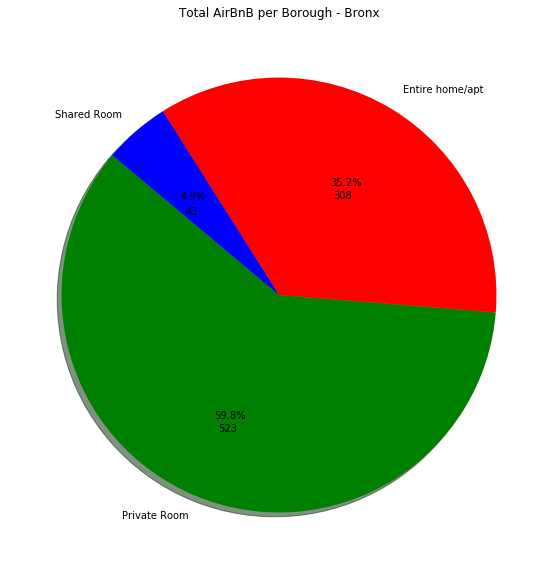

In [206]:
#Labels for sections
labels =["Private Room","Entire home/apt","Shared Room"]

sizes = [523,308,43]

colors = ["green","red","blue"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.annotate('308',xy =(.25,.44))
plt.annotate('523',xy =(-0.28,-.63))
plt.annotate('43',xy =(-.43,.37))
plt.title('Total AirBnB per Borough - Bronx')
plt.savefig(os.path.join(output_path, 'NYC_Bronx_Property_Count.png'))
plt.show()

In [207]:
Bk = RT_NG.loc['Brooklyn']
Bk
Bk['Pct of Group'] = Bk['name']/Bk['name'].sum()*100
Bk.round(2)

,name,Pct of Group
room_type,,
Entire home/apt,8158,49.65
Private room,7984,48.59
Shared room,288,1.75


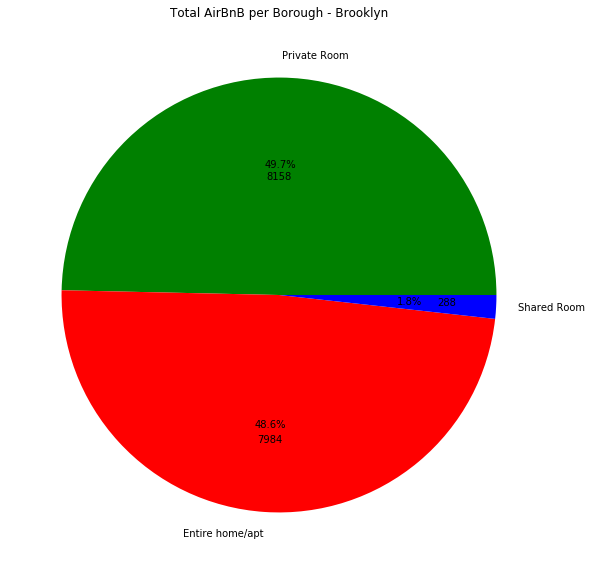

In [208]:
labels =["Private Room","Entire home/apt","Shared Room"]
colors = ["green","red","blue"]

plt.pie(Bk['Pct of Group'],labels=labels,colors=colors,autopct="%1.1f%%")

plt.annotate('8158',xy = (-0.06,.53))
plt.annotate('7984',xy = (-.10,-0.68))    
plt.annotate('288',xy = (.73,-0.05))
plt.title('Total AirBnB per Borough - Brooklyn')
plt.savefig(os.path.join(output_path, 'NYC_Brooklyn_Property_Count.png'))
plt.show()

In [209]:
Mnhtn = RT_NG.loc['Manhattan']
Mnhtn
Mnhtn['Pct of Group'] = Mnhtn['name']/Mnhtn['name'].sum()*100
Mnhtn.round(2)

,name,Pct of Group
room_type,,
Entire home/apt,9962,59.94
Private room,6303,37.92
Shared room,356,2.14


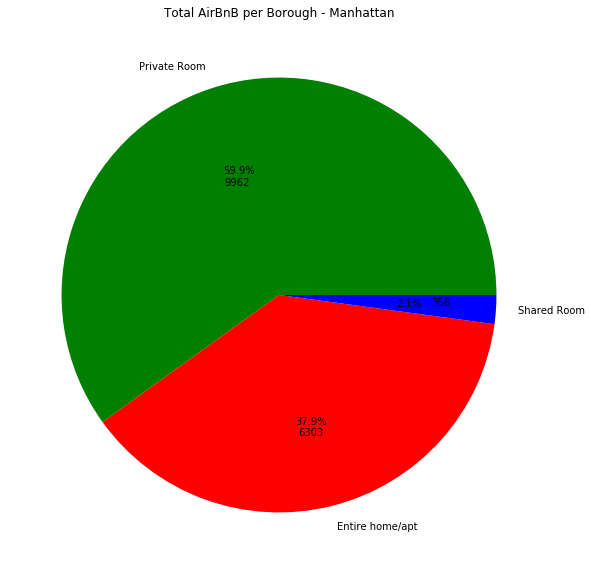

In [210]:
colors = ["green","red","blue"]

plt.pie(Mnhtn['Pct of Group'],labels=labels,colors=colors,autopct="%1.1f%%")

plt.annotate('9962',xy =(-.25,.50))
plt.annotate('6303',xy =(0.09,-0.65))
plt.annotate('356',xy =(0.7,-0.05))
plt.title('Total AirBnB per Borough - Manhattan')
plt.savefig(os.path.join(output_path, 'NYC_Manhattan_Property_Count.png'))
plt.show()

In [211]:
Qns = RT_NG.loc['Queens']
Qns
Qns['Pct of Group'] = Qns['name']/Qns['name'].sum()*100
Qns.round(2)

,name,Pct of Group
room_type,,
Entire home/apt,1742,38.10
Private room,2678,58.57
Shared room,152,3.32


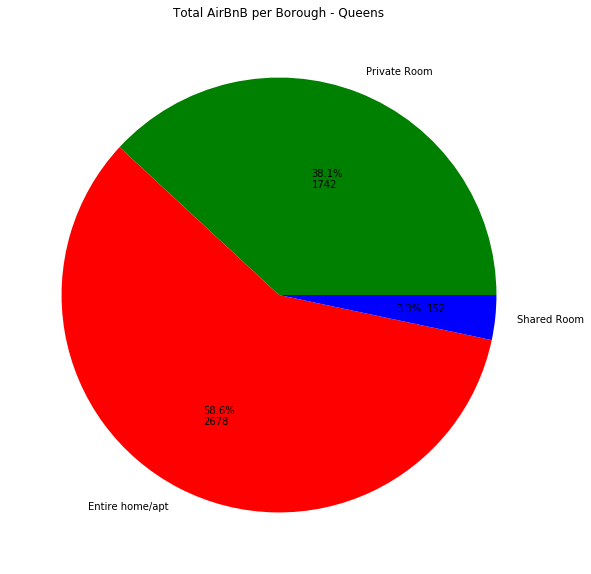

In [212]:
colors = ["green","red","blue"]
plt.pie(Qns['Pct of Group'],labels=labels,colors=colors,autopct="%1.1f%%")
plt.annotate('2678',xy=(-.35,-.6))
plt.annotate('1742',xy=(.15,.49))
plt.annotate('152',xy=(.68,-.08))
plt.title('Total AirBnB per Borough - Queens')
plt.savefig(os.path.join(output_path, 'NYC_Queens_Property_Count.png'))
plt.show()

In [213]:
St_Isl = RT_NG.loc['Staten Island']
St_Isl
St_Isl['Pct of Group'] = St_Isl['name']/St_Isl['name'].sum()*100
St_Isl.round(2)

,name,Pct of Group
room_type,,
Entire home/apt,150,47.77
Private room,159,50.64
Shared room,5,1.59


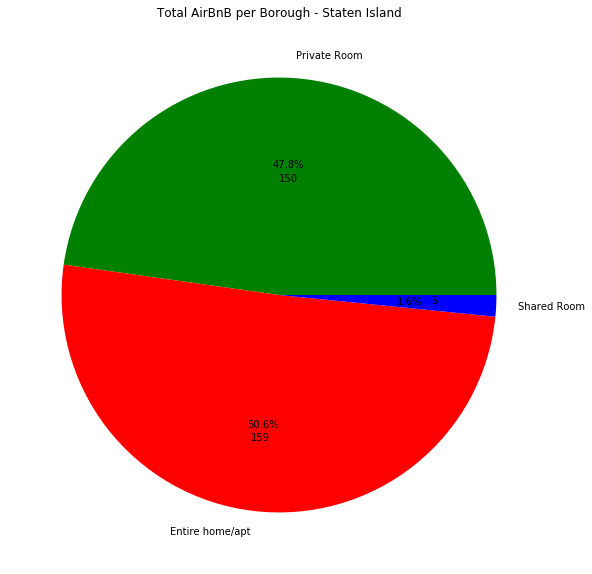

In [214]:
colors = ["green","red","blue"]
plt.pie(St_Isl['Pct of Group'],labels=labels,colors=colors,autopct="%1.1f%%")
plt.annotate('159',xy=(-.13,-.67))
plt.annotate('150',xy=(0,.52))
plt.annotate('5',xy=(.70,-0.04))
plt.title('Total AirBnB per Borough - Staten Island')
plt.savefig(os.path.join(output_path, 'NYC_Staten_Island_Property_Count.png'))
plt.show()

In [215]:
avgday_borough = cleaned_data[["neighbourhood_group","name","availability_365","room_type"]]
avgday_borough.head(15)

,neighbourhood_group,name,availability_365,room_type
0,Brooklyn,Clean & quiet apt home by the park,365,Private room
1,Manhattan,Skylit Midtown Castle,355,Entire home/apt
2,Brooklyn,Cozy Entire Floor of Brownstone,194,Entire home/apt
3,Manhattan,Entire Apt: Spacious Studio/Loft by central park,0,Entire home/apt
4,Manhattan,Large Cozy 1 BR Apartment In Midtown East,129,Entire home/apt
5,Brooklyn,BlissArtsSpace!,0,Private room
6,Manhattan,Large Furnished Room Near B'way,220,Private room
7,Manhattan,Cozy Clean Guest Room - Family Apt,0,Private room
8,Manhattan,Cute & Cozy Lower East Side 1 bdrm,188,Entire home/apt
9,Manhattan,Beautiful 1br on Upper West Side,6,Entire home/apt


In [216]:
gb_avgday =  avgday_borough.groupby(['neighbourhood_group','room_type'])
GB_AVG = gb_avgday.mean()
GB_AVG.round(2)

availability_365
neighbourhood_group room_type                        
Bronx               Entire home/apt            168.85
                    Private room               173.72
                    Shared room                156.42
Brooklyn            Entire home/apt            102.27
                    Private room               107.08
                    Shared room                172.07
Manhattan           Entire home/apt            111.03
                    Private room               104.48
                    Shared room                148.26
Queens              Entire home/apt            139.39
                    Private room               154.99
                    Shared room                200.50
Staten Island       Entire home/apt            184.03
                    Private room               229.82
                    Shared room                 85.00

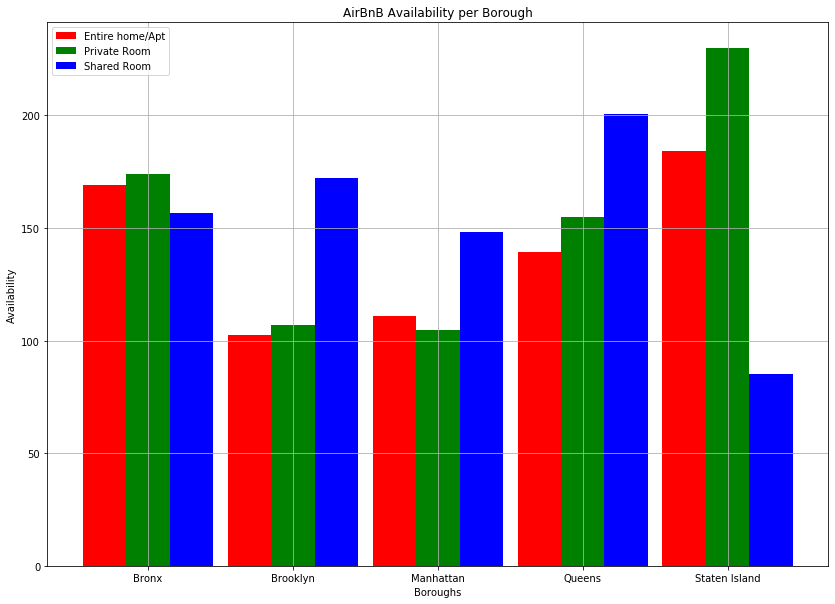

In [217]:
GB_AVG_entire = [GB_AVG['availability_365'][0], GB_AVG['availability_365'][3],
                 GB_AVG['availability_365'][6], GB_AVG['availability_365'][9],
                 GB_AVG['availability_365'][12]]
GB_AVG_private = [GB_AVG['availability_365'][1], GB_AVG['availability_365'][4],
                 GB_AVG['availability_365'][7], GB_AVG['availability_365'][10],
                 GB_AVG['availability_365'][13]]
GB_AVG_shared = [GB_AVG['availability_365'][2], GB_AVG['availability_365'][5],
                 GB_AVG['availability_365'][8], GB_AVG['availability_365'][11],
                 GB_AVG['availability_365'][14]]


pos = (1,2,3,4,5)
plt.xticks(pos,('Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'))

plt.bar(np.arange(1, 6) - 0.3, GB_AVG_entire, width = 0.3,label = 'Entire home/Apt', color = 'red')
plt.bar(np.arange(1, 6), GB_AVG_private, width = 0.3,label = 'Private Room', color = 'green')
plt.bar(np.arange(1, 6) + 0.3, GB_AVG_shared, width = 0.3,label = 'Shared Room', color = 'blue')

plt.ylabel('Availability')
plt.xlabel('Boroughs')
plt.title('AirBnB Availability per Borough')
plt.grid()
plt.legend()
plt.savefig(os.path.join(output_path, 'NYC_Borough_Property_Type_Availability.png'))
plt.show()

In [218]:
avgnight_borough = cleaned_data[["neighbourhood_group","name","minimum_nights","room_type"]]
avgnight_borough.head(17)

,neighbourhood_group,name,minimum_nights,room_type
0,Brooklyn,Clean & quiet apt home by the park,1,Private room
1,Manhattan,Skylit Midtown Castle,1,Entire home/apt
2,Brooklyn,Cozy Entire Floor of Brownstone,1,Entire home/apt
3,Manhattan,Entire Apt: Spacious Studio/Loft by central park,10,Entire home/apt
4,Manhattan,Large Cozy 1 BR Apartment In Midtown East,3,Entire home/apt
5,Brooklyn,BlissArtsSpace!,45,Private room
6,Manhattan,Large Furnished Room Near B'way,2,Private room
7,Manhattan,Cozy Clean Guest Room - Family Apt,2,Private room
8,Manhattan,Cute & Cozy Lower East Side 1 bdrm,1,Entire home/apt
9,Manhattan,Beautiful 1br on Upper West Side,5,Entire home/apt


In [219]:
gb_avgnight =  avgnight_borough.groupby(['neighbourhood_group','room_type'])
GB_NIGHT = gb_avgnight.mean()
GB_NIGHT.round()

minimum_nights
neighbourhood_group room_type                      
Bronx               Entire home/apt             6.0
                    Private room                3.0
                    Shared room                 2.0
Brooklyn            Entire home/apt             6.0
                    Private room                5.0
                    Shared room                 6.0
Manhattan           Entire home/apt             9.0
                    Private room                5.0
                    Shared room                 3.0
Queens              Entire home/apt             4.0
                    Private room                4.0
                    Shared room                 4.0
Staten Island       Entire home/apt             4.0
                    Private room                3.0
                    Shared room                 3.0

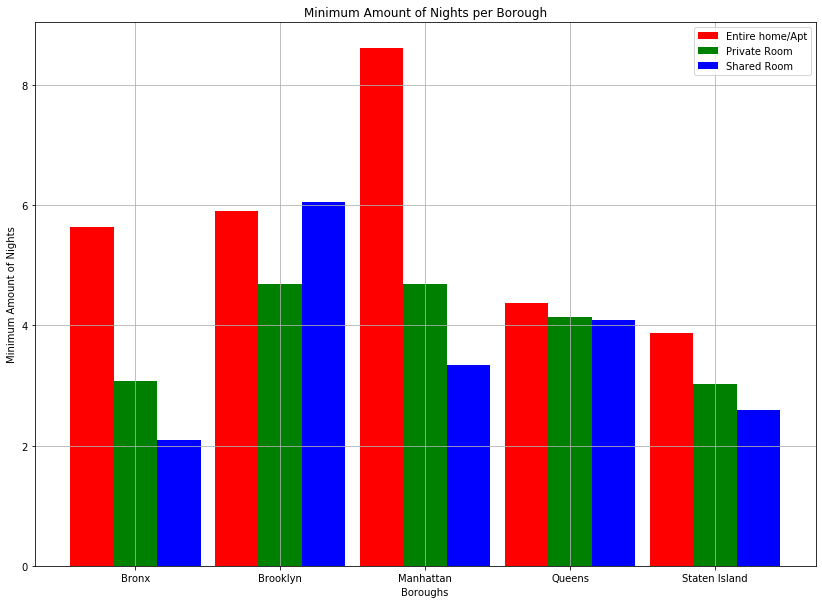

In [220]:
GB_NIGHT_entire = [GB_NIGHT['minimum_nights'][0], GB_NIGHT['minimum_nights'][3],
                 GB_NIGHT['minimum_nights'][6], GB_NIGHT['minimum_nights'][9],
                 GB_NIGHT['minimum_nights'][12]]
GB_NIGHT_private = [GB_NIGHT['minimum_nights'][1], GB_NIGHT['minimum_nights'][4],
                 GB_NIGHT['minimum_nights'][7], GB_NIGHT['minimum_nights'][10],
                 GB_NIGHT['minimum_nights'][13]]
GB_NIGHT_shared = [GB_NIGHT['minimum_nights'][2], GB_NIGHT['minimum_nights'][5],
                 GB_NIGHT['minimum_nights'][8], GB_NIGHT['minimum_nights'][11],
                 GB_NIGHT['minimum_nights'][14]]

plt.bar(np.arange(1, 6) - 0.3, GB_NIGHT_entire, width = 0.3,label = 'Entire home/Apt', color = 'red')
plt.bar(np.arange(1, 6), GB_NIGHT_private, width = 0.3,label = 'Private Room', color = 'green')
plt.bar(np.arange(1, 6) + 0.3, GB_NIGHT_shared, width = 0.3,label = 'Shared Room', color = 'blue')

pos = (1,2,3,4,5)
plt.xticks(pos,('Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'))
plt.ylabel('Minimum Amount of Nights')
plt.xlabel('Boroughs')
plt.title('Minimum Amount of Nights per Borough')
plt.grid()
plt.legend()
plt.savefig(os.path.join(output_path, 'NYC_Borough_Property_Type_Minimum_Nights.png'))
plt.show()


### NYC Neighborhood Data (Natalie)

In [221]:
#In each borough, what are the 5 neighborhoods with the most reviews?
most_reviews_df = cleaned_data[["neighbourhood_group","neighbourhood", "number_of_reviews" ]]
most_reviews_grouped = most_reviews_df.groupby(["neighbourhood_group", "neighbourhood"])
#finding the average of the top reviews per borough, per neighborhood
top_reviews_df = most_reviews_grouped.mean()

#Per borough, dataframe is sorted by highest amount of reviews in each neighborhood
top_reviews_sorted = top_reviews_df.sort_values(['neighbourhood_group', "number_of_reviews"], ascending = [True, False])
top_reviews_sorted.head()

number_of_reviews
neighbourhood_group neighbourhood                   
Bronx               Mount Eden             84.000000
                    Castle Hill            59.000000
                    Highbridge             58.227273
                    Baychester             51.666667
                    City Island            50.600000

In [222]:
#find neighborhoods with top 5 reviews PER BOROUGH
bronx_reviews = top_reviews_sorted.loc["Bronx"].head()
staten_island_reviews = top_reviews_sorted.loc["Staten Island"].head()
brooklyn_reviews = top_reviews_sorted.loc["Brooklyn"].head()
manhattan_reviews = top_reviews_sorted.loc["Manhattan"].head()
queens_reviews = top_reviews_sorted.loc["Queens"].head()
brooklyn_reviews

,number_of_reviews
neighbourhood,
Manhattan Beach,57.857143
DUMBO,57.583333
South Slope,42.469388
Canarsie,39.540741
Dyker Heights,37.727273


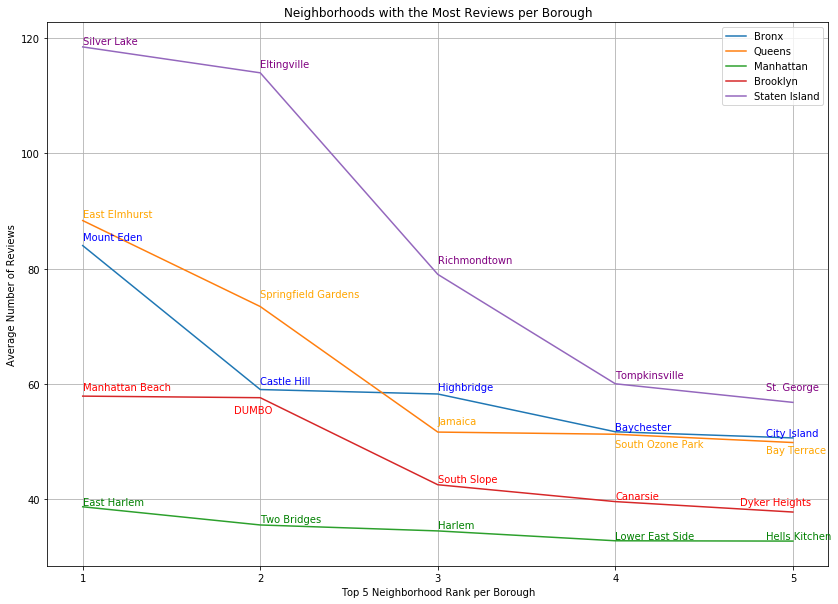

In [223]:
x_axis = [1,2,3,4,5]
xticks= [value for value in x_axis]
plt.plot(x_axis, bronx_reviews, label="Bronx")
plt.plot(x_axis, queens_reviews, label="Queens")
plt.plot(x_axis, manhattan_reviews, label="Manhattan")
plt.plot(x_axis, brooklyn_reviews, label="Brooklyn")
plt.plot(x_axis, staten_island_reviews, label="Staten Island")
plt.legend()
plt.xticks(xticks)
plt.ylabel("Average Number of Reviews")
plt.xlabel("Top 5 Neighborhood Rank per Borough")
plt.title("Neighborhoods with the Most Reviews per Borough")
plt.annotate('Manhattan Beach', (1, 59), color = 'red')
plt.annotate('DUMBO', (1.85, 55), color = 'red')
plt.annotate('South Slope', (3, 43), color = 'red')
plt.annotate('Canarsie', (4, 40), color = 'red')
plt.annotate('Dyker Heights', (4.7, 39), color = 'red')
plt.annotate('Silver Lake', (1, 119), color = 'purple')
plt.annotate('Eltingville', (2, 115), color = 'purple')
plt.annotate('Richmondtown', (3, 81), color = 'purple')
plt.annotate('Tompkinsville', (4, 61), color = 'purple')
plt.annotate('St. George', (4.85, 59), color = 'purple')
plt.annotate('East Elmhurst', (1, 89), color = 'orange')
plt.annotate('Springfield Gardens', (2, 75), color = 'orange')
plt.annotate('Jamaica', (3, 53), color = 'orange')
plt.annotate('South Ozone Park', (4, 49), color = 'orange')
plt.annotate('Bay Terrace', (4.85, 48), color = 'orange')
plt.annotate('East Harlem', (1, 39), color = 'green')
plt.annotate('Two Bridges', (2, 36), color = 'green')
plt.annotate('Harlem', (3, 35), color = 'green')
plt.annotate('Lower East Side', (4, 33), color = 'green')
plt.annotate('Hells Kitchen', (4.85, 33), color = 'green')
plt.annotate('Mount Eden', (1, 85), color = 'blue')
plt.annotate('Castle Hill', (2, 60), color = 'blue')
plt.annotate('Highbridge', (3, 59), color = 'blue')
plt.annotate('Baychester', (4, 52), color = 'blue')
plt.annotate('City Island', (4.85, 51), color = 'blue')
plt.grid()
plt.savefig(os.path.join(output_path, 'NYC_Borough_Neighborhood_Most_Reviews.png'))
plt.show()

In [224]:
#Starting question #2, "In each borough, what are the 5 neighborhoods with the most of each property type?"
property_type_df = cleaned_data[["neighbourhood_group","neighbourhood", "room_type" ]]
property_type_grouped = property_type_df.groupby(["neighbourhood_group","neighbourhood"])
property_type_count = property_type_grouped["room_type"].value_counts()

#isolating a borough and it's room type count
bronx_property = pd.DataFrame(property_type_count.loc["Bronx"])
bronx_property = bronx_property.rename(columns={"room_type":"type_counts"})

#resetting index to room type so that I can later loc each property type into a dataframe by borough
bronx_property = bronx_property.reset_index()
bronx_property = bronx_property.set_index(["room_type"])

#Isolating private room counts for the bronx and sorting by highest type_count
bronx_property_private = bronx_property.loc["Private room"]
bronx_property_sorted = bronx_property_private.sort_values(["type_counts"],ascending=False)
bronx_property_sorted.head()

,neighbourhood,type_counts
room_type,,
Private room,Kingsbridge,35
Private room,Fordham,35
Private room,Longwood,32
Private room,Mott Haven,30
Private room,Wakefield,27


In [225]:
#Isolating shared room counts for the bronx and sorting by highest type_count (displays top 5)
bronx_property_shared = bronx_property.loc["Shared room"]
bronx_shared_sorted = bronx_property_shared.sort_values(["type_counts"],ascending=False)
bronx_shared_sorted.head()

,neighbourhood,type_counts
room_type,,
Shared room,Port Morris,15
Shared room,Van Nest,3
Shared room,Fordham,3
Shared room,Kingsbridge,3
Shared room,Parkchester,3


In [226]:
#Isolating entire house/apt room counts for the bronx and sorting by highest type_count (displays top 5)
bronx_property_entirehome= bronx_property.loc["Entire home/apt"]
bronx_entirehome_sorted = bronx_property_entirehome.sort_values(["type_counts"],ascending=False)
bronx_entirehome_sorted.head()

,neighbourhood,type_counts
room_type,,
Entire home/apt,Mott Haven,23
Entire home/apt,Williamsbridge,17
Entire home/apt,Pelham Gardens,17
Entire home/apt,Concourse,16
Entire home/apt,Kingsbridge,16


In [227]:
#isolating a borough and it's room type count
staten_property = pd.DataFrame(property_type_count.loc["Staten Island"])
staten_property = staten_property.rename(columns={"room_type":"type_counts"})

#resetting index to room type so that I can later loc each property type into a dataframe by borough
staten_property = staten_property.reset_index()
staten_property = staten_property.set_index(["room_type"])

#Isolating private room counts for staten island and sorting by highest type_count
staten_property_private = staten_property.loc["Private room"]
staten_private_sorted = staten_property_private.sort_values(["type_counts"],ascending=False)
staten_private_sorted.head()

,neighbourhood,type_counts
room_type,,
Private room,Tompkinsville,25
Private room,Concord,19
Private room,Stapleton,16
Private room,St. George,15
Private room,West Brighton,12


In [228]:
#Isolating shared room counts for staten island and sorting by highest type_count (displays top 5)
staten_property_shared = staten_property.loc["Shared room"]
staten_shared_sorted = staten_property_shared.sort_values(["type_counts"],ascending=False)
staten_shared_sorted.head()

,neighbourhood,type_counts
room_type,,
Shared room,Clifton,2
Shared room,Concord,1
Shared room,Randall Manor,1
Shared room,South Beach,1


In [229]:
#Isolating entire home/apt counts for staten island and sorting by highest type_count (displays top 5)
staten_property_entirehome= staten_property.loc["Entire home/apt"]
staten_entirehome_sorted = staten_property_entirehome.sort_values(["type_counts"],ascending=False)
staten_entirehome_sorted.head()

,neighbourhood,type_counts
room_type,,
Entire home/apt,St. George,20
Entire home/apt,Tompkinsville,15
Entire home/apt,Arrochar,10
Entire home/apt,Clifton,8
Entire home/apt,Randall Manor,8


In [230]:
#isolating a borough and it's room type count
queens_property = pd.DataFrame(property_type_count.loc["Queens"])
queens_property = queens_property.rename(columns={"room_type":"type_counts"})

#resetting index to room type so that I can later loc each property type into a dataframe by borough
queens_property = queens_property.reset_index()
queens_property = queens_property.set_index(["room_type"])

#Isolating private room counts for Queens and sorting by highest type_count
queens_property_private = queens_property.loc["Private room"]
queens_private_sorted = queens_property_private.sort_values(["type_counts"],ascending=False)
queens_private_sorted.head()

,neighbourhood,type_counts
room_type,,
Private room,Astoria,386
Private room,Flushing,264
Private room,Long Island City,223
Private room,Ridgewood,194
Private room,Sunnyside,167


In [231]:
#Isolating shared room counts for Queens and sorting by highest type_count (displays top 5)
queens_property_shared = queens_property.loc["Shared room"]
queens_shared_sorted = queens_property_shared.sort_values(["type_counts"],ascending=False)
queens_shared_sorted.head()

,neighbourhood,type_counts
room_type,,
Shared room,Corona,23
Shared room,Astoria,19
Shared room,Sunnyside,19
Shared room,Long Island City,11
Shared room,Jackson Heights,9


In [232]:
#Isolating Entire home/apt counts for Queens and sorting by highest type_count (displays top 5)
queens_property_entirehome = queens_property.loc["Entire home/apt"]
queens_entirehome_sorted = queens_property_entirehome.sort_values(["type_counts"],ascending=False)
queens_entirehome_sorted.head()

,neighbourhood,type_counts
room_type,,
Entire home/apt,Astoria,304
Entire home/apt,Long Island City,182
Entire home/apt,Sunnyside,108
Entire home/apt,Ditmars Steinway,103
Entire home/apt,Ridgewood,103


In [233]:
#isolating a borough and it's room type count
brooklyn_property = pd.DataFrame(property_type_count.loc["Brooklyn"])
brooklyn_property = brooklyn_property.rename(columns={"room_type":"type_counts"})

#resetting index to room type so that I can later loc each property type into a dataframe by borough
brooklyn_property = brooklyn_property.reset_index()
brooklyn_property = brooklyn_property.set_index(["room_type"])

#Isolating private room counts for Brooklyn and sorting by highest type_count
brooklyn_property_private = brooklyn_property.loc["Private room"]
brooklyn_property_sorted = brooklyn_property_private.sort_values(["type_counts"],ascending=False)
brooklyn_property_sorted.head()

,neighbourhood,type_counts
room_type,,
Private room,Bedford-Stuyvesant,1628
Private room,Williamsburg,1573
Private room,Bushwick,1335
Private room,Crown Heights,597
Private room,Greenpoint,359


In [234]:
#Isolating shared room counts for Brooklyn and sorting by highest type_count (displays top 5)
brooklyn_property_shared = brooklyn_property.loc["Shared room"]
brooklyn_shared_sorted = brooklyn_property_shared.sort_values(["type_counts"],ascending=False)
brooklyn_shared_sorted.head()

,neighbourhood,type_counts
room_type,,
Shared room,Bedford-Stuyvesant,71
Shared room,Bushwick,34
Shared room,Williamsburg,21
Shared room,East Flatbush,18
Shared room,Flatbush,17


In [235]:
#Isolating Entire home/apt counts for Brooklyn and sorting by highest type_count (displays top 5)
brooklyn_property_entirehome = brooklyn_property.loc["Entire home/apt"]
brooklyn_entirehome_sorted = brooklyn_property_entirehome.sort_values(["type_counts"],ascending=False)
brooklyn_entirehome_sorted.head()

,neighbourhood,type_counts
room_type,,
Entire home/apt,Williamsburg,1568
Entire home/apt,Bedford-Stuyvesant,1438
Entire home/apt,Crown Heights,653
Entire home/apt,Bushwick,570
Entire home/apt,Greenpoint,496


In [236]:
#isolating a borough and it's room type count
manhattan_property = pd.DataFrame(property_type_count.loc["Manhattan"])
manhattan_property = manhattan_property.rename(columns={"room_type":"type_counts"})

#resetting index to room type so that I can later loc each property type into a dataframe by borough
manhattan_property = manhattan_property.reset_index()
manhattan_property = manhattan_property.set_index(["room_type"])

#Isolating private room counts for Manhattan and sorting by highest type_count
manhattan_property_private = manhattan_property.loc["Private room"]
manhattan_property_sorted = manhattan_property_private.sort_values(["type_counts"],ascending=False)
manhattan_property_sorted.head()

,neighbourhood,type_counts
room_type,,
Private room,Harlem,1290
Private room,Hell's Kitchen,558
Private room,East Village,524
Private room,Upper West Side,523
Private room,East Harlem,483


In [237]:
#Isolating shared room counts for Manhattan and sorting by highest type_count (displays top 5)
manhattan_property_shared = manhattan_property.loc["Shared room"]
manhattan_shared_sorted = manhattan_property_shared.sort_values(["type_counts"],ascending=False)
manhattan_shared_sorted.head()

,neighbourhood,type_counts
room_type,,
Shared room,Hell's Kitchen,85
Shared room,East Harlem,42
Shared room,Upper East Side,36
Shared room,Harlem,35
Shared room,Upper West Side,23


In [238]:
#Isolating Entire home/apt counts for Manhattan and sorting by highest type_count (displays top 5)
manhattan_property_entirehome= manhattan_property.loc["Entire home/apt"]
manhattan_entirehome_sorted = manhattan_property_entirehome.sort_values(["type_counts"],ascending=False)
manhattan_entirehome_sorted.head()

,neighbourhood,type_counts
room_type,,
Entire home/apt,Upper East Side,1000
Entire home/apt,East Village,950
Entire home/apt,Upper West Side,936
Entire home/apt,Hell's Kitchen,885
Entire home/apt,Harlem,879


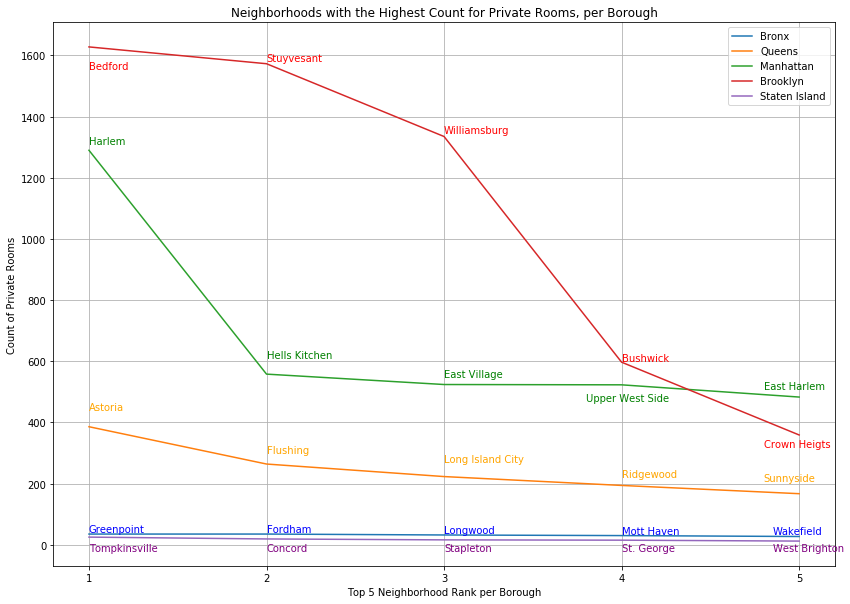

In [239]:
#Scatter plot for counts of property type for each of the top 5 neighborhoods - by borough 
x_axis = [1,2,3,4,5]
plt.plot(x_axis, bronx_property_sorted["type_counts"][0:5], label="Bronx")
plt.plot(x_axis, queens_private_sorted["type_counts"][0:5], label="Queens")
plt.plot(x_axis, manhattan_property_sorted["type_counts"][0:5], label="Manhattan")
plt.plot(x_axis, brooklyn_property_sorted["type_counts"][0:5], label="Brooklyn")
plt.plot(x_axis, staten_private_sorted["type_counts"][0:5], label="Staten Island")
xticks= [value for value in x_axis]
plt.legend()
plt.xticks(xticks)
plt.annotate('Astoria', (1, 440), color = 'orange')
plt.annotate('Flushing', (2, 300), color = 'orange')
plt.annotate('Long Island City', (3, 270), color = 'orange')
plt.annotate('Ridgewood', (4, 220), color = 'orange')
plt.annotate('Sunnyside', (4.80, 210), color = 'orange')
plt.annotate('Harlem', (1, 1310), color = 'green')
plt.annotate('Hells Kitchen', (2, 610), color = 'green')
plt.annotate('East Village', (3, 550), color = 'green')
plt.annotate('Upper West Side', (3.80, 470), color = 'green')
plt.annotate('East Harlem', (4.80, 510), color = 'green')
plt.annotate('Bedford', (1, 1555), color = 'red')
plt.annotate('Stuyvesant', (2, 1583), color = 'red')
plt.annotate('Williamsburg', (3, 1345), color = 'red')
plt.annotate('Bushwick', (4, 600), color = 'red')
plt.annotate('Crown Heigts', (4.80, 320), color = 'red')
plt.annotate('Greenpoint', (1, 43), color = 'blue')
plt.annotate('Fordham', (2, 43), color = 'blue')
plt.annotate('Longwood', (3, 40), color = 'blue')
plt.annotate('Mott Haven', (4, 36), color = 'blue')
plt.annotate('Wakefield', (4.85, 35), color = 'blue')
plt.annotate('Tompkinsville', (1, -20), color = 'purple')
plt.annotate('Concord', (2, -20), color = 'purple')
plt.annotate('Stapleton', (3, -20), color = 'purple')
plt.annotate('St. George', (4, -20), color = 'purple')
plt.annotate('West Brighton', (4.85, -20), color = 'purple')
plt.ylabel("Count of Private Rooms")
plt.xlabel("Top 5 Neighborhood Rank per Borough")
plt.title("Neighborhoods with the Highest Count for Private Rooms, per Borough")
plt.grid()
plt.savefig(os.path.join(output_path, 'NYC_Borough_Neighborhood_Private_Room_Highest_Count.png'))
plt.show()

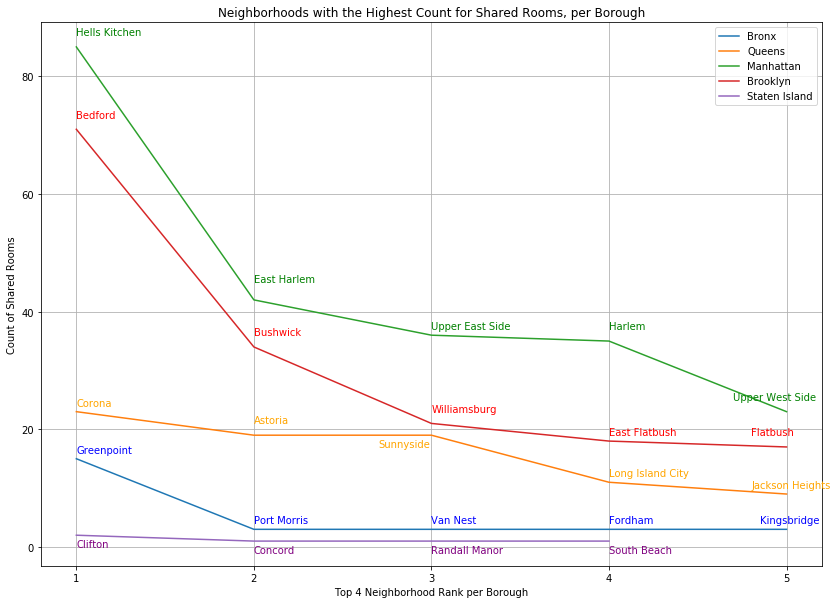

In [240]:
#Scatter plot for counts of property type for each of the top 5 neighborhoods - by borough 
#THERE ARE ONLY 4 NEIGHBORHOODS FOR THIS ONE BECAUSE STATEN ISLAND ONLY HAD 4 SHARED ROOM PROPERTIES
new_x_axis = [1,2,3,4,5]
plt.plot(new_x_axis, bronx_shared_sorted["type_counts"][0:5], label="Bronx")
plt.plot(new_x_axis, queens_shared_sorted["type_counts"][0:5], label="Queens")
plt.plot(new_x_axis, manhattan_shared_sorted["type_counts"][0:5], label="Manhattan")
plt.plot(new_x_axis, brooklyn_shared_sorted["type_counts"][0:5], label="Brooklyn")
plt.plot([1,2,3,4], staten_shared_sorted["type_counts"][0:4], label="Staten Island")
xticks= [value for value in new_x_axis]
plt.legend()
plt.xticks(xticks)
plt.annotate('Corona', (1, 24), color = 'orange')
plt.annotate('Astoria', (2, 21), color = 'orange')
plt.annotate('Sunnyside', (2.7, 17), color = 'orange')
plt.annotate('Long Island City', (4, 12), color = 'orange')
plt.annotate('Jackson Heights', (4.80, 10), color = 'orange')
plt.annotate('Hells Kitchen', (1, 87), color = 'green')
plt.annotate('East Harlem', (2, 45), color = 'green')
plt.annotate('Upper East Side', (3, 37), color = 'green')
plt.annotate('Harlem', (4, 37), color = 'green')
plt.annotate('Upper West Side', (4.70, 25), color = 'green')
plt.annotate('Bedford', (1, 73), color = 'red')
plt.annotate('Bushwick', (2, 36), color = 'red')
plt.annotate('Williamsburg', (3, 23), color = 'red')
plt.annotate('East Flatbush', (4, 19), color = 'red')
plt.annotate('Flatbush', (4.80, 19), color = 'red')
plt.annotate('Greenpoint', (1, 16), color = 'blue')
plt.annotate('Port Morris', (2, 4), color = 'blue')
plt.annotate('Van Nest', (3, 4), color = 'blue')
plt.annotate('Fordham', (4, 4), color = 'blue')
plt.annotate('Kingsbridge', (4.85, 4), color = 'blue')
plt.annotate('Clifton', (1, 0), color = 'purple')
plt.annotate('Concord', (2, -1), color = 'purple')
plt.annotate('Randall Manor', (3, -1), color = 'purple')
plt.annotate('South Beach', (4, -1), color = 'purple')
plt.ylabel("Count of Shared Rooms")
plt.xlabel("Top 4 Neighborhood Rank per Borough")
plt.title("Neighborhoods with the Highest Count for Shared Rooms, per Borough")
plt.grid()
plt.savefig(os.path.join(output_path, 'NYC_Borough_Neighborhood_Shared_Room_Highest_Count.png'))
plt.show()

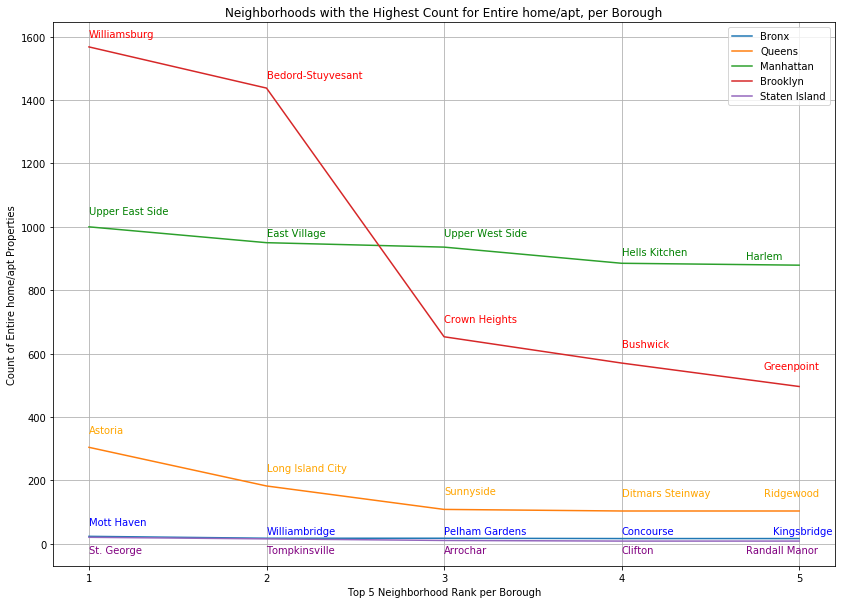

In [241]:
#Scatter plot for counts of property type for each of the top 5 neighborhoods - by borough 
plt.plot(x_axis, bronx_entirehome_sorted["type_counts"][0:5], label="Bronx")
plt.plot(x_axis, queens_entirehome_sorted["type_counts"][0:5], label="Queens")
plt.plot(x_axis, manhattan_entirehome_sorted["type_counts"][0:5], label="Manhattan")
plt.plot(x_axis, brooklyn_entirehome_sorted["type_counts"][0:5], label="Brooklyn")
plt.plot(x_axis, staten_entirehome_sorted["type_counts"][0:5], label="Staten Island")
xticks= [value for value in x_axis]
plt.legend()
plt.xticks(xticks)
plt.annotate('Astoria', (1, 350), color = 'orange')
plt.annotate('Long Island City', (2, 230), color = 'orange')
plt.annotate('Sunnyside', (3, 158), color = 'orange')
plt.annotate('Ditmars Steinway', (4, 150), color = 'orange')
plt.annotate('Ridgewood', (4.80, 150), color = 'orange')
plt.annotate('Upper East Side', (1, 1040), color = 'green')
plt.annotate('East Village', (2, 970), color = 'green')
plt.annotate('Upper West Side', (3, 970), color = 'green')
plt.annotate('Hells Kitchen', (4, 910), color = 'green')
plt.annotate('Harlem', (4.70, 900), color = 'green')
plt.annotate('Williamsburg', (1, 1600), color = 'red')
plt.annotate('Bedord-Stuyvesant', (2, 1470), color = 'red')
plt.annotate('Crown Heights', (3, 700), color = 'red')
plt.annotate('Bushwick', (4, 620), color = 'red')
plt.annotate('Greenpoint', (4.80, 550), color = 'red')
plt.annotate('Mott Haven', (1, 60), color = 'blue')
plt.annotate('Williambridge', (2, 30), color = 'blue')
plt.annotate('Pelham Gardens', (3, 30), color = 'blue')
plt.annotate('Concourse', (4, 30), color = 'blue')
plt.annotate('Kingsbridge', (4.85, 30), color = 'blue')
plt.annotate('St. George', (1, -30), color = 'purple')
plt.annotate('Tompkinsville', (2, -30), color = 'purple')
plt.annotate('Arrochar', (3, -30), color = 'purple')
plt.annotate('Clifton', (4, -30), color = 'purple')
plt.annotate('Randall Manor', (4.7, -30), color = 'purple')
plt.ylabel("Count of Entire home/apt Properties")
plt.xlabel("Top 5 Neighborhood Rank per Borough")
plt.title("Neighborhoods with the Highest Count for Entire home/apt, per Borough")
plt.grid()
plt.savefig(os.path.join(output_path, 'NYC_Borough_Neighborhood_Entire_Home_Highest_Count.png'))
plt.show()

In [242]:
#In each borough, what are the 5 neighborhoods with the highest average price for each property type?
price_df = cleaned_data[["neighbourhood_group","neighbourhood", "room_type", "price"]]

#reset index as boroughs
price_df = price_df.set_index(["neighbourhood_group"])

In [243]:
#isolating one borough - Bronx
average_price_bronx = price_df.loc["Bronx"]
average_price_bronx = average_price_bronx.reset_index()
average_price_bronx.drop("neighbourhood_group", axis=1, inplace=True)

#regroup by room type so that I can separate the dataframes based on room type later on
#also display this groupby by using the mean function for price
bronx_price_grouped = average_price_bronx.groupby(["room_type", "neighbourhood", ])
bronx_average_price = bronx_price_grouped.mean()

#breakdown the bronx data into one room type - entire home/apt - and display top 5 neighborhoods
bronx_price_sorted = bronx_average_price.sort_values(["room_type", "price"], ascending = [True, False])
bronx_high_entirehome = bronx_price_sorted.loc["Entire home/apt"]
bronx_high_entirehome.head()

,price
neighbourhood,
Belmont,228.666667
Westchester Square,221.750000
Spuyten Duyvil,186.333333
Eastchester,184.800000
Unionport,183.750000


In [244]:
#display the bottom 5 neighborhoods based on price of entire home/apt for BRONX
bronx_price_sorted = bronx_average_price.sort_values(["room_type", "price"], ascending = [True, True])
bronx_low_entirehome = bronx_price_sorted.loc["Entire home/apt"]
bronx_low_entirehome.head()

,price
neighbourhood,
Woodlawn,65.5
Bronxdale,73.0
Castle Hill,74.0
Soundview,75.0
Edenwald,82.2


In [245]:
#breakdown the bronx data into one room type - private room - and display top 5 neighborhoods
bronx_price_sorted = bronx_average_price.sort_values(["room_type", "price"], ascending = [True, False])
bronx_high_private = bronx_price_sorted.loc["Private room"]
bronx_high_private.head()

,price
neighbourhood,
Edenwald,87.500000
Clason Point,82.666667
Olinville,80.000000
West Farms,79.000000
East Morrisania,78.333333


In [246]:
#display the bottom 5 neighborhoods based on lowest price of private room for BRONX
bronx_price_sorted = bronx_average_price.sort_values(["room_type", "price"], ascending = [True, True])
bronx_low_private = bronx_price_sorted.loc["Private room"]
bronx_low_private.head()

,price
neighbourhood,
Van Nest,36.666667
Mount Eden,38.250000
Tremont,39.000000
Pelham Gardens,39.625000
Bronxdale,40.800000


In [247]:
#breakdown the bronx data into one room type - shared room - and display top 5 neighborhoods
bronx_price_sorted = bronx_average_price.sort_values(["room_type", "price"], ascending = [True, False])
bronx_high_shared = bronx_price_sorted.loc["Shared room"]
bronx_high_shared.head()

,price
neighbourhood,
Riverdale,800.0
Woodlawn,70.0
Concourse Village,60.0
Bronxdale,57.0
Fieldston,50.0


In [248]:
#display the bottom 5 neighborhoods based on lowest price of shared room for BRONX
bronx_price_sorted = bronx_average_price.sort_values(["room_type", "price"], ascending = [True, True])
bronx_low_shared = bronx_price_sorted.loc["Shared room"]
bronx_low_shared.head()

,price
neighbourhood,
Morris Heights,20.0
Schuylerville,20.0
Van Nest,20.0
Olinville,26.0
Norwood,33.0


In [249]:
#isolating one borough - Staten Island
average_price_staten = price_df.loc["Staten Island"]
average_price_staten = average_price_staten.reset_index()
average_price_staten.drop("neighbourhood_group", axis=1, inplace=True)

#regroup by room type so that I can separate the dataframes based on room type later on
#also display this groupby by using the mean function for price
staten_price_grouped = average_price_staten.groupby(["room_type", "neighbourhood", ])
staten_average_price = staten_price_grouped.mean()

#breakdown the Staten Island data into one room type - Entire home/apt - and display top 5 neighborhoods
staten_price_sorted = staten_average_price.sort_values(["room_type", "price"], ascending = [True, False])
staten_high_entirehome = staten_price_sorted.loc["Entire home/apt"]
staten_high_entirehome.head()

,price
neighbourhood,
South Beach,275.000000
Port Richmond,250.000000
New Brighton,249.000000
Willowbrook,249.000000
Todt Hill,208.666667


In [250]:
#display the bottom 5 neighborhoods based on lowest price of entire home/apt for STATEN ISLAND
staten_price_sorted = staten_average_price.sort_values(["room_type", "price"], ascending = [True, True])
staten_low_entirehome = staten_price_sorted.loc["Entire home/apt"]
staten_low_entirehome.head()

,price
neighbourhood,
Emerson Hill,63.500000
Eltingville,70.000000
Grant City,70.666667
Rossville,75.000000
Arden Heights,76.000000


In [251]:
#breakdown the Staten Island data into one room type - private room - and display top 5 neighborhoods
staten_price_sorted = staten_average_price.sort_values(["room_type", "price"], ascending = [True, False])
staten_high_private = staten_price_sorted.loc["Private room"]
staten_high_private.head()

,price
neighbourhood,
Great Kills,108.800000
Grymes Hill,89.000000
Emerson Hill,80.000000
Midland Beach,80.000000
St. George,72.866667


In [252]:
#display the bottom 5 neighborhoods based on lowest price of private room for STATEN ISLAND
staten_price_sorted = staten_average_price.sort_values(["room_type", "price"], ascending = [True, True])
staten_low_private = staten_price_sorted.loc["Private room"]
staten_low_private.head()

,price
neighbourhood,
Graniteville,20.0
Grant City,30.0
New Dorp Beach,38.0
Westerleigh,40.0
Arden Heights,41.0


In [253]:
#breakdown the Staten Island data into one room type - shared room - and display top 5 neighborhoods
staten_price_sorted = staten_average_price.sort_values(["room_type", "price"], ascending = [True, False])
staten_high_shared = staten_price_sorted.loc["Shared room"]
staten_high_shared.head()

,price
neighbourhood,
Clifton,112.5
Concord,30.0
South Beach,20.0
Randall Manor,13.0


In [254]:
#display the bottom 5 neighborhoods based on lowest price of shared room for STATEN ISLAND
staten_price_sorted = staten_average_price.sort_values(["room_type", "price"], ascending = [True, True])
staten_low_shared = staten_price_sorted.loc["Shared room"]
staten_low_shared.head()

,price
neighbourhood,
Randall Manor,13.0
South Beach,20.0
Concord,30.0
Clifton,112.5


In [255]:
#isolating one borough - Brooklyn
average_price_brooklyn = price_df.loc["Brooklyn"]
average_price_brooklyn = average_price_brooklyn.reset_index()
average_price_brooklyn.drop("neighbourhood_group", axis=1, inplace=True)

#regroup by room type so that I can separate the dataframes based on room type later on
#also display this groupby by using the mean function for price
brooklyn_price_grouped = average_price_brooklyn.groupby(["room_type", "neighbourhood"])
brooklyn_average_price = brooklyn_price_grouped.mean()

#breakdown the brooklyn data into one room type - Entire home/apt - and display top 5 neighborhoods
brooklyn_price_sorted = brooklyn_average_price.sort_values(["room_type", "price"], ascending = [True, False])
brooklyn_high_entirehome = brooklyn_price_sorted.loc["Entire home/apt"]
brooklyn_high_entirehome.head()

,price
neighbourhood,
Sea Gate,611.000000
Cypress Hills,242.294118
Clinton Hill,230.461279
Cobble Hill,222.594203
Brooklyn Heights,221.950980


In [256]:
#display the bottom 5 neighborhoods based on lowest price of entire home/apt for BROOKLYN
brooklyn_price_sorted = brooklyn_average_price.sort_values(["room_type", "price"], ascending = [True, True])
brooklyn_low_entirehome = brooklyn_price_sorted.loc["Entire home/apt"]
brooklyn_low_entirehome.head()

,price
neighbourhood,
Midwood,97.081081
Bensonhurst,103.320000
Bergen Beach,108.714286
Gravesend,110.562500
Borough Park,111.583333


In [257]:
#breakdown the brooklyn data into one room type - private room - and display top 5 neighborhoods
brooklyn_price_sorted = brooklyn_average_price.sort_values(["room_type", "price"], ascending = [True, False])
brooklyn_high_private = brooklyn_price_sorted.loc["Private room"]
brooklyn_high_private.head()

,price
neighbourhood,
Coney Island,160.000000
DUMBO,139.000000
Navy Yard,125.000000
Brooklyn Heights,109.272727
Sea Gate,97.000000


In [258]:
#display the bottom 5 neighborhoods based on lowest price of private room for BROOKLYN
brooklyn_price_sorted = brooklyn_average_price.sort_values(["room_type", "price"], ascending = [True, True])
brooklyn_low_private = brooklyn_price_sorted.loc["Private room"]
brooklyn_low_private.head()

,price
neighbourhood,
Borough Park,53.210526
Kensington,55.160494
Bath Beach,55.625000
Cypress Hills,56.283582
Brownsville,57.897436


In [259]:
#breakdown the brooklyn data into one room type - Shared room - and display top 5 neighborhoods
brooklyn_price_sorted = brooklyn_average_price.sort_values(["room_type", "price"], ascending = [True, False])
brooklyn_high_shared = brooklyn_price_sorted.loc["Shared room"]
brooklyn_high_shared.head()

,price
neighbourhood,
Vinegar Hill,250.000000
East New York,87.666667
Bensonhurst,79.000000
Park Slope,78.000000
Williamsburg,76.333333


In [260]:
#display the bottom 5 neighborhoods based on lowest price of shared room for BROOKLYN
brooklyn_price_sorted = brooklyn_average_price.sort_values(["room_type", "price"], ascending = [True, True])
brooklyn_low_shared = brooklyn_price_sorted.loc["Shared room"]
brooklyn_low_shared.head()

,price
neighbourhood,
Flatlands,22.000000
Fort Hamilton,30.000000
Coney Island,32.250000
Red Hook,34.000000
Fort Greene,34.333333


In [261]:
#isolating one borough - Queens
average_price_queens = price_df.loc["Queens"]
average_price_queens= average_price_queens.reset_index()
average_price_queens.drop("neighbourhood_group", axis=1, inplace=True)

#regroup by room type so that I can separate the dataframes based on room type later on
#also display this groupby by using the mean function for price
queens_price_grouped = average_price_queens.groupby(["room_type", "neighbourhood"])
queens_average_price = queens_price_grouped.mean()

#breakdown the queens data into one room type - Entire home/apt - and display top 5 neighborhoods
queens_price_sorted = queens_average_price.sort_values(["room_type", "price"], ascending = [True, False])
queens_high_entirehome = queens_price_sorted.loc["Entire home/apt"]
queens_high_entirehome.head()

,price
neighbourhood,
Bayside,380.250000
Neponsit,274.666667
Whitestone,263.333333
Jamaica Hills,236.666667
Arverne,201.024390


In [262]:
#display the bottom 5 neighborhoods based on lowest price of entire home/apt for QUEENS
queens_price_sorted = queens_average_price.sort_values(["room_type", "price"], ascending = [True, True])
queens_low_entirehome = queens_price_sorted.loc["Entire home/apt"]
queens_low_entirehome.head()

,price
neighbourhood,
Queens Village,93.633333
Woodhaven,103.500000
Ozone Park,108.250000
Kew Gardens Hills,113.071429
Hollis,116.666667


In [263]:
#breakdown the queens data into one room type - Private room - and display top 5 neighborhoods
queens_price_sorted = queens_average_price.sort_values(["room_type", "price"], ascending = [True, False])
queens_high_private= queens_price_sorted.loc["Private room"]
queens_high_private.head()

,price
neighbourhood,
Breezy Point,195.000000
Belle Harbor,178.333333
Holliswood,159.000000
Astoria,97.290155
Bay Terrace,94.500000


In [264]:
#display the bottom 5 neighborhoods based on lowest price of Private room for QUEENS
queens_price_sorted = queens_average_price.sort_values(["room_type", "price"], ascending = [True, True])
queens_low_private= queens_price_sorted.loc["Private room"]
queens_low_private.head()

,price
neighbourhood,
Whitestone,46.600000
Jamaica Estates,47.333333
Little Neck,47.500000
Glendale,48.826087
Far Rockaway,49.266667


In [265]:
#breakdown the queens data into one room type - Shared room - and display top 5 neighborhoods
queens_price_sorted = queens_average_price.sort_values(["room_type", "price"], ascending = [True, False])
queens_high_shared= queens_price_sorted.loc["Shared room"]
queens_high_shared.head()

,price
neighbourhood,
Astoria,166.526316
Long Island City,153.272727
Springfield Gardens,120.000000
Woodside,65.000000
Ditmars Steinway,61.000000


In [266]:
#display the bottom 5 neighborhoods based on lowest price of shared room for QUEENS
queens_price_sorted = queens_average_price.sort_values(["room_type", "price"], ascending = [True, True])
queens_low_shared= queens_price_sorted.loc["Shared room"]
queens_low_shared.head()

,price
neighbourhood,
South Ozone Park,30.666667
Corona,31.521739
Bay Terrace,32.000000
Little Neck,32.000000
Ridgewood,32.571429


In [267]:
#isolating one borough - Manhattan
average_price_manhattan= price_df.loc["Manhattan"]
average_price_manhattan= average_price_manhattan.reset_index()
average_price_manhattan.drop("neighbourhood_group", axis=1, inplace=True)

#regroup by room type so that I can separate the dataframes based on room type later on
#also display this groupby by using the mean function for price
manhattan_price_grouped = average_price_manhattan.groupby(["room_type", "neighbourhood"])
manhattan_average_price = manhattan_price_grouped.mean()

#breakdown the manhattan data into one room type - Entire home/apt - and display top 5 neighborhoods
manhattan_price_sorted = manhattan_average_price.sort_values(["room_type", "price"], ascending = [True, False])
manhattan_high_entirehome = manhattan_price_sorted.loc["Entire home/apt"]
manhattan_high_entirehome.head()

,price
neighbourhood,
Tribeca,556.058824
SoHo,357.453125
Flatiron District,323.234043
NoHo,313.789474
Theater District,302.835616


In [268]:
#display the bottom 5 neighborhoods based on lowest price of Entire home/apt for MANHATTAN
manhattan_price_sorted = manhattan_average_price.sort_values(["room_type", "price"], ascending = [True, True])
manhattan_low_entirehome = manhattan_price_sorted.loc["Entire home/apt"]
manhattan_low_entirehome.head()

,price
neighbourhood,
Marble Hill,92.250000
Inwood,110.811765
Washington Heights,136.303419
Morningside Heights,147.316239
Two Bridges,161.142857


In [269]:
#breakdown the manhattan data into one room type - private room - and display top 5 neighborhoods
manhattan_price_sorted = manhattan_average_price.sort_values(["room_type", "price"], ascending = [True, False])
manhattan_high_private = manhattan_price_sorted.loc["Private room"]
manhattan_high_private.head()

,price
neighbourhood,
Midtown,222.194030
West Village,179.752941
Theater District,173.835616
Flatiron District,155.818182
Lower East Side,137.663194


In [270]:
#display the bottom 5 neighborhoods based on lowest price of private rooms for MANHATTAN
manhattan_price_sorted = manhattan_average_price.sort_values(["room_type", "price"], ascending = [True, True])
manhattan_low_private = manhattan_price_sorted.loc["Private room"]
manhattan_low_private.head()

,price
neighbourhood,
Washington Heights,63.620985
Inwood,66.629310
Roosevelt Island,79.959184
Harlem,80.077519
Morningside Heights,85.156716


In [271]:
#breakdown the manhattan data into one room type - shared room - and display top 5 neighborhoods
manhattan_price_sorted = manhattan_average_price.sort_values(["room_type", "price"], ascending = [True, False])
manhattan_high_shared = manhattan_price_sorted.loc["Shared room"]
manhattan_high_shared.head()

,price
neighbourhood,
West Village,180.000
Murray Hill,178.625
SoHo,147.500
Financial District,109.250
Midtown,98.600


In [272]:
#display the bottom 5 neighborhoods based on lowest price of shared rooms for MANHATTAN
manhattan_price_sorted = manhattan_average_price.sort_values(["room_type", "price"], ascending = [True, True])
manhattan_low_shared = manhattan_price_sorted.loc["Shared room"]
manhattan_low_shared.head()

,price
neighbourhood,
Inwood,34.500000
Roosevelt Island,37.500000
Lower East Side,52.772727
Battery Park City,55.000000
Washington Heights,55.400000


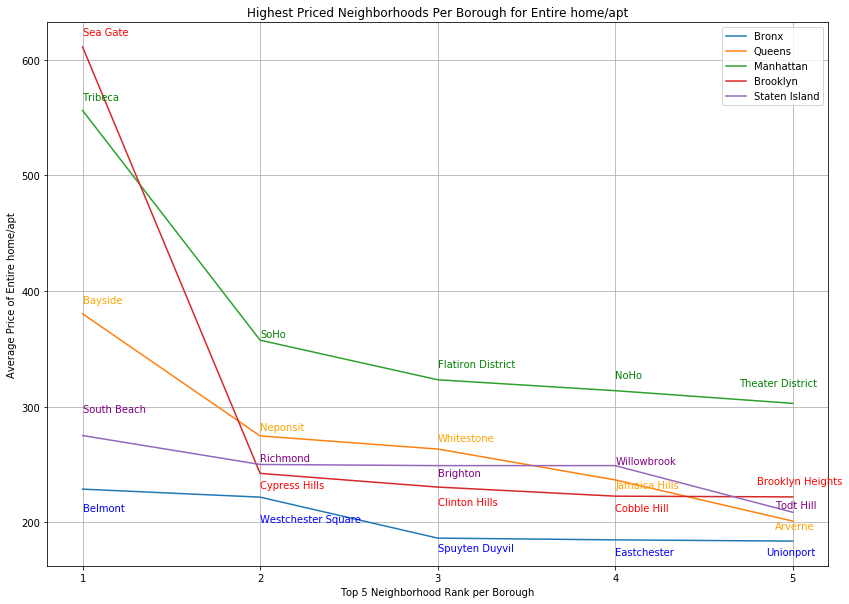

In [273]:
#Scatter plot for average price per property type for each of the top 5 neighborhoods - by borough 
x_axis = [1,2,3,4,5]
plt.plot(x_axis, bronx_high_entirehome["price"][0:5], label="Bronx")
plt.plot(x_axis, queens_high_entirehome["price"][0:5], label="Queens")
plt.plot(x_axis, manhattan_high_entirehome["price"][0:5], label="Manhattan")
plt.plot(x_axis, brooklyn_high_entirehome["price"][0:5], label="Brooklyn")
plt.plot(x_axis, staten_high_entirehome["price"][0:5], label="Staten Island")
xticks= [value for value in x_axis]
plt.legend()
plt.xticks(xticks)
plt.annotate('Bayside', (1, 390), color = 'orange')
plt.annotate('Neponsit', (2, 280), color = 'orange')
plt.annotate('Whitestone', (3, 270), color = 'orange')
plt.annotate('Jamaica Hills', (4, 230), color = 'orange')
plt.annotate('Arverne', (4.90, 194), color = 'orange')
plt.annotate('Tribeca', (1, 565), color = 'green')
plt.annotate('SoHo', (2, 360), color = 'green')
plt.annotate('Flatiron District', (3, 334), color = 'green')
plt.annotate('NoHo', (4, 325), color = 'green')
plt.annotate('Theater District', (4.70, 318), color = 'green')
plt.annotate('Sea Gate', (1, 621), color = 'red')
plt.annotate('Cypress Hills', (2, 230), color = 'red')
plt.annotate('Clinton Hills', (3, 215), color = 'red')
plt.annotate('Cobble Hill', (4, 210), color = 'red')
plt.annotate('Brooklyn Heights', (4.80, 233), color = 'red')
plt.annotate('Belmont', (1, 210), color = 'blue')
plt.annotate('Westchester Square', (2, 200), color = 'blue')
plt.annotate('Spuyten Duyvil', (3, 175), color = 'blue')
plt.annotate('Eastchester', (4, 172), color = 'blue')
plt.annotate('Unionport', (4.85, 172), color = 'blue')
plt.annotate('South Beach', (1, 295), color = 'purple')
plt.annotate('Richmond', (2, 253), color = 'purple')
plt.annotate('Brighton', (3, 240), color = 'purple')
plt.annotate('Willowbrook', (4, 250), color = 'purple')
plt.annotate('Todt Hill', (4.9, 212), color = 'purple')
plt.ylabel("Average Price of Entire home/apt")
plt.xlabel("Top 5 Neighborhood Rank per Borough")
plt.title("Highest Priced Neighborhoods Per Borough for Entire home/apt")
plt.grid()
plt.savefig(os.path.join(output_path, 'NYC_Borough_Neighborhood_Entire_Home_Highest_Price.png'))
plt.show()

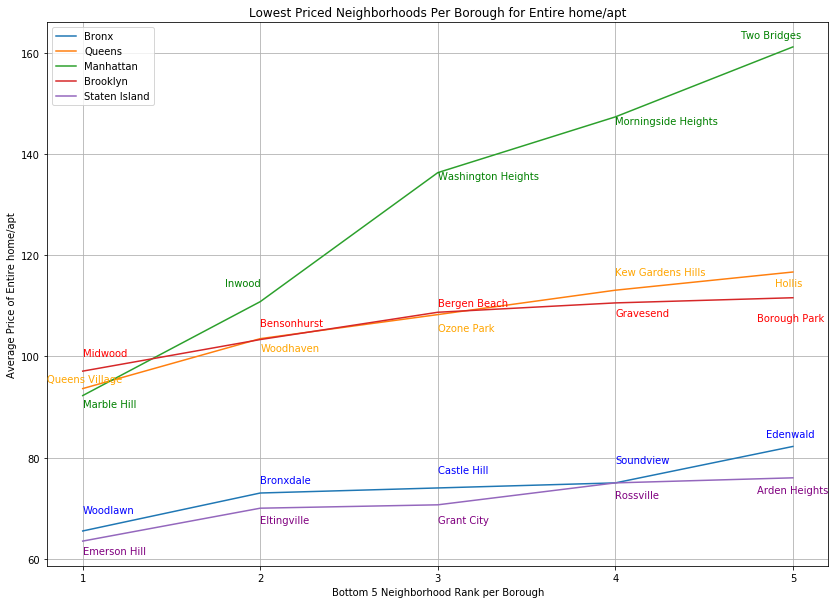

In [274]:
#Scatter plot for average price per property type for each of the Bottom 5 neighborhoods - by borough 
x_axis = [1,2,3,4,5]
plt.plot(x_axis, bronx_low_entirehome["price"][0:5], label="Bronx")
plt.plot(x_axis, queens_low_entirehome["price"][0:5], label="Queens")
plt.plot(x_axis, manhattan_low_entirehome["price"][0:5], label="Manhattan")
plt.plot(x_axis, brooklyn_low_entirehome["price"][0:5], label="Brooklyn")
plt.plot(x_axis, staten_low_entirehome["price"][0:5], label="Staten Island")
xticks= [value for value in x_axis]
plt.legend()
plt.xticks(xticks)
plt.annotate('Queens Village', (0.8, 95), color = 'orange')
plt.annotate('Woodhaven', (2, 101), color = 'orange')
plt.annotate('Ozone Park', (3, 105), color = 'orange')
plt.annotate('Kew Gardens Hills', (4, 116), color = 'orange')
plt.annotate('Hollis', (4.90, 114), color = 'orange')
plt.annotate('Marble Hill', (1, 90), color = 'green')
plt.annotate('Inwood', (1.8, 114), color = 'green')
plt.annotate('Washington Heights', (3, 135), color = 'green')
plt.annotate('Morningside Heights', (4, 146), color = 'green')
plt.annotate('Two Bridges', (4.70, 163), color = 'green')
plt.annotate('Midwood', (1, 100), color = 'red')
plt.annotate('Bensonhurst', (2, 106), color = 'red')
plt.annotate('Bergen Beach', (3, 110), color = 'red')
plt.annotate('Gravesend', (4, 108), color = 'red')
plt.annotate('Borough Park', (4.80, 107), color = 'red')
plt.annotate('Woodlawn', (1, 69), color = 'blue')
plt.annotate('Bronxdale', (2, 75), color = 'blue')
plt.annotate('Castle Hill', (3, 77), color = 'blue')
plt.annotate('Soundview', (4, 79), color = 'blue')
plt.annotate('Edenwald', (4.85, 84), color = 'blue')
plt.annotate('Emerson Hill', (1, 61), color = 'purple')
plt.annotate('Eltingville', (2, 67), color = 'purple')
plt.annotate('Grant City', (3, 67), color = 'purple')
plt.annotate('Rossville', (4, 72), color = 'purple')
plt.annotate('Arden Heights', (4.8, 73), color = 'purple')
plt.ylabel("Average Price of Entire home/apt")
plt.ylabel("Average Price of Entire home/apt")
plt.xlabel("Bottom 5 Neighborhood Rank per Borough")
plt.title("Lowest Priced Neighborhoods Per Borough for Entire home/apt")
plt.grid()
plt.savefig(os.path.join(output_path, 'NYC_Borough_Neighborhood_Entire_Home_Lowest_Price.png'))
plt.show()

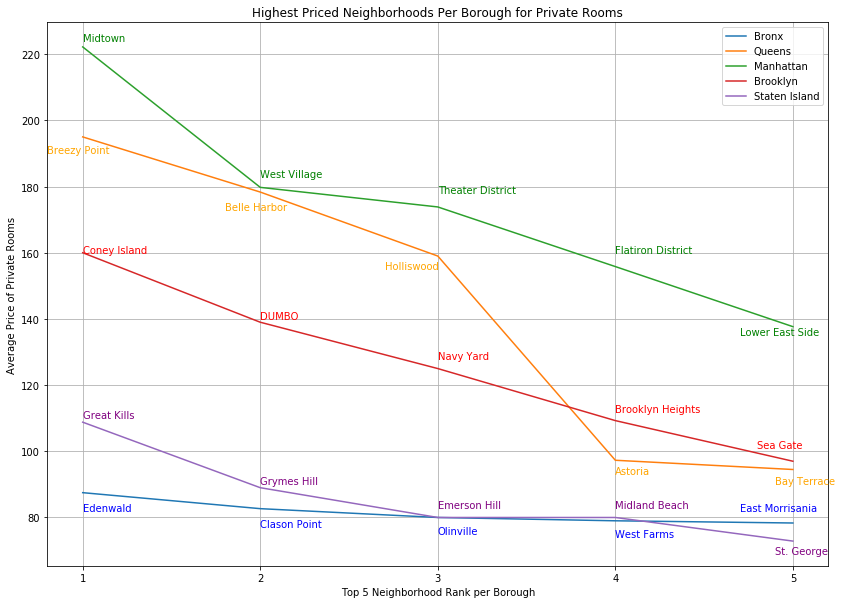

In [275]:
#Scatter plot for average price per property type for each of the top 5 neighborhoods - by borough 
x_axis = [1,2,3,4,5]
plt.plot(x_axis, bronx_high_private["price"][0:5], label="Bronx")
plt.plot(x_axis, queens_high_private["price"][0:5], label="Queens")
plt.plot(x_axis, manhattan_high_private["price"][0:5], label="Manhattan")
plt.plot(x_axis, brooklyn_high_private["price"][0:5], label="Brooklyn")
plt.plot(x_axis, staten_high_private["price"][0:5], label="Staten Island")
xticks= [value for value in x_axis]
plt.legend()
plt.xticks(xticks)
plt.annotate('Breezy Point', (.8, 190), color = 'orange')
plt.annotate('Belle Harbor', (1.8, 173), color = 'orange')
plt.annotate('Holliswood', (2.7, 155), color = 'orange')
plt.annotate('Astoria', (4, 93), color = 'orange')
plt.annotate('Bay Terrace', (4.90, 90), color = 'orange')
plt.annotate('Midtown', (1, 224), color = 'green')
plt.annotate('West Village', (2, 183), color = 'green')
plt.annotate('Theater District', (3, 178), color = 'green')
plt.annotate('Flatiron District', (4, 160), color = 'green')
plt.annotate('Lower East Side', (4.70, 135), color = 'green')
plt.annotate('Coney Island', (1, 160), color = 'red')
plt.annotate('DUMBO', (2, 140), color = 'red')
plt.annotate('Navy Yard', (3, 128), color = 'red')
plt.annotate('Brooklyn Heights', (4, 112), color = 'red')
plt.annotate('Sea Gate', (4.80, 101), color = 'red')
plt.annotate('Edenwald', (1, 82), color = 'blue')
plt.annotate('Clason Point', (2, 77), color = 'blue')
plt.annotate('Olinville', (3, 75), color = 'blue')
plt.annotate('West Farms', (4, 74), color = 'blue')
plt.annotate('East Morrisania', (4.70, 82), color = 'blue')
plt.annotate('Great Kills', (1, 110), color = 'purple')
plt.annotate('Grymes Hill', (2, 90), color = 'purple')
plt.annotate('Emerson Hill', (3, 83), color = 'purple')
plt.annotate('Midland Beach', (4, 83), color = 'purple')
plt.annotate('St. George', (4.9, 69), color = 'purple')
plt.ylabel("Average Price of Private Rooms")
plt.xlabel("Top 5 Neighborhood Rank per Borough")
plt.title("Highest Priced Neighborhoods Per Borough for Private Rooms")
plt.grid()
plt.savefig(os.path.join(output_path, 'NYC_Borough_Neighborhood_Private_Room_Highest_Price.png'))
plt.show()

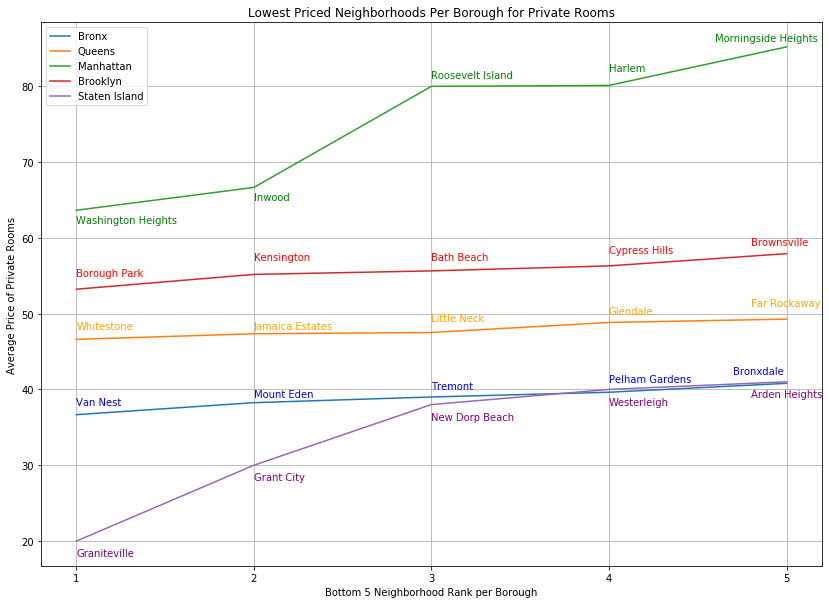

In [276]:
#Scatter plot for average price per property type for each of the Bottom 5 neighborhoods - by borough 
x_axis = [1,2,3,4,5]
plt.plot(x_axis, bronx_low_private["price"][0:5], label="Bronx")
plt.plot(x_axis, queens_low_private["price"][0:5], label="Queens")
plt.plot(x_axis, manhattan_low_private["price"][0:5], label="Manhattan")
plt.plot(x_axis, brooklyn_low_private["price"][0:5], label="Brooklyn")
plt.plot(x_axis, staten_low_private["price"][0:5], label="Staten Island")
xticks= [value for value in x_axis]
plt.legend()
plt.xticks(xticks)
plt.annotate('Whitestone', (1, 48), color = 'orange')
plt.annotate('Jamaica Estates', (2, 48), color = 'orange')
plt.annotate('Little Neck', (3, 49), color = 'orange')
plt.annotate('Glendale', (4, 50), color = 'orange')
plt.annotate('Far Rockaway', (4.80, 51), color = 'orange')
plt.annotate('Washington Heights', (1, 62), color = 'green')
plt.annotate('Inwood', (2, 65), color = 'green')
plt.annotate('Roosevelt Island', (3, 81), color = 'green')
plt.annotate('Harlem', (4, 82), color = 'green')
plt.annotate('Morningside Heights', (4.60, 86), color = 'green')
plt.annotate('Borough Park', (1, 55), color = 'red')
plt.annotate('Kensington', (2, 57), color = 'red')
plt.annotate('Bath Beach', (3, 57), color = 'red')
plt.annotate('Cypress Hills', (4, 58), color = 'red')
plt.annotate('Brownsville', (4.80, 59), color = 'red')
plt.annotate('Van Nest', (1, 38), color = 'blue')
plt.annotate('Mount Eden', (2, 39), color = 'blue')
plt.annotate('Tremont', (3, 40), color = 'blue')
plt.annotate('Pelham Gardens', (4, 41), color = 'blue')
plt.annotate('Bronxdale', (4.70, 42), color = 'blue')
plt.annotate('Graniteville', (1, 18), color = 'purple')
plt.annotate('Grant City', (2, 28), color = 'purple')
plt.annotate('New Dorp Beach', (3, 36), color = 'purple')
plt.annotate('Westerleigh', (4, 38), color = 'purple')
plt.annotate('Arden Heights', (4.8, 39), color = 'purple')
plt.ylabel("Average Price of Private Rooms")
plt.xlabel("Bottom 5 Neighborhood Rank per Borough")
plt.title("Lowest Priced Neighborhoods Per Borough for Private Rooms")
plt.grid()
plt.savefig(os.path.join(output_path, 'NYC_Borough_Neighborhood_Private_Room_Lowest_Price.png'))
plt.show()

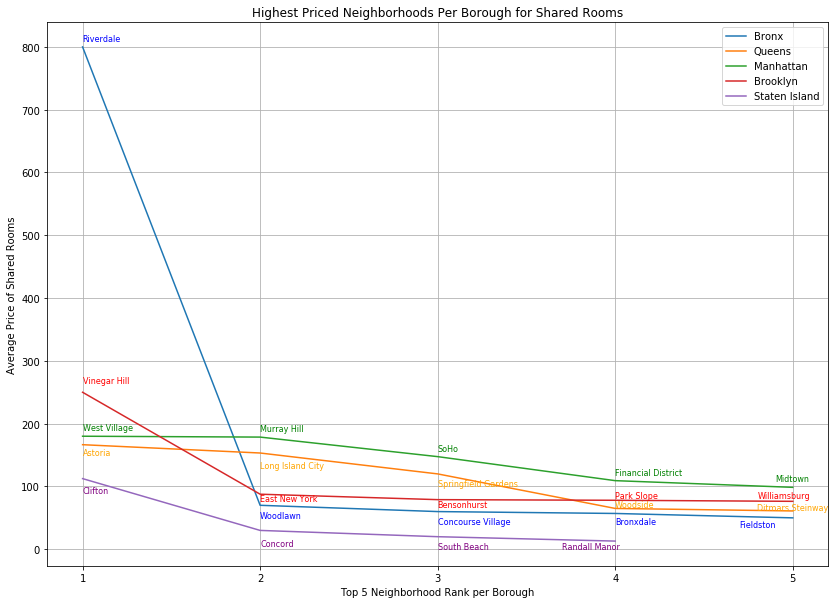

In [277]:
#Scatter plot for average price per property type for each of the top 5 neighborhoods - by borough 
x_axis = [1,2,3,4,5]
plt.plot(x_axis, bronx_high_shared["price"][0:5], label="Bronx")
plt.plot(x_axis, queens_high_shared["price"][0:5], label="Queens")
plt.plot(x_axis, manhattan_high_shared["price"][0:5], label="Manhattan")
plt.plot(x_axis, brooklyn_high_shared["price"][0:5], label="Brooklyn")
plt.plot([1,2,3,4], staten_high_shared["price"][0:4], label="Staten Island")
xticks= [value for value in x_axis]
plt.legend()
plt.xticks(xticks)
plt.annotate('Astoria', (1, 150), color = 'orange', fontsize=8)
plt.annotate('Long Island City', (2, 130), color = 'orange', fontsize=8)
plt.annotate('Springfield Gardens', (3, 100), color = 'orange', fontsize=8)
plt.annotate('Woodside', (4, 68), color = 'orange', fontsize=8)
plt.annotate('Ditmars Steinway', (4.80, 63), color = 'orange', fontsize=8)
plt.annotate('West Village', (1, 190), color = 'green', fontsize=8)
plt.annotate('Murray Hill', (2, 188), color = 'green', fontsize=8)
plt.annotate('SoHo', (3, 157), color = 'green', fontsize=8)
plt.annotate('Financial District', (4, 119), color = 'green', fontsize=8)
plt.annotate('Midtown', (4.90, 108), color = 'green', fontsize=8)
plt.annotate('Vinegar Hill', (1, 265), color = 'red', fontsize=8)
plt.annotate('East New York', (2, 77), color = 'red', fontsize=8)
plt.annotate('Bensonhurst', (3, 68), color = 'red', fontsize=8)
plt.annotate('Park Slope', (4, 82), color = 'red', fontsize=8)
plt.annotate('Williamsburg', (4.80, 82), color = 'red', fontsize=8)
plt.annotate('Riverdale', (1, 810), color = 'blue', fontsize=8)
plt.annotate('Woodlawn', (2, 50), color = 'blue', fontsize=8)
plt.annotate('Concourse Village', (3, 40), color = 'blue', fontsize=8)
plt.annotate('Bronxdale', (4, 40), color = 'blue', fontsize=8)
plt.annotate('Fieldston', (4.70, 35), color = 'blue', fontsize=8)
plt.annotate('Clifton', (1, 90), color = 'purple', fontsize=8)
plt.annotate('Concord', (2, 5), color = 'purple', fontsize=8)
plt.annotate('South Beach', (3, 0), color = 'purple', fontsize=8)
plt.annotate('Randall Manor', (3.7, 0), color = 'purple', fontsize=8)
plt.ylabel("Average Price of Shared Rooms")
plt.xlabel("Top 5 Neighborhood Rank per Borough")
plt.title("Highest Priced Neighborhoods Per Borough for Shared Rooms")
plt.grid()
plt.savefig(os.path.join(output_path, 'NYC_Borough_Neighborhood_Shared_Room_Highest_Price.png'))
plt.show()

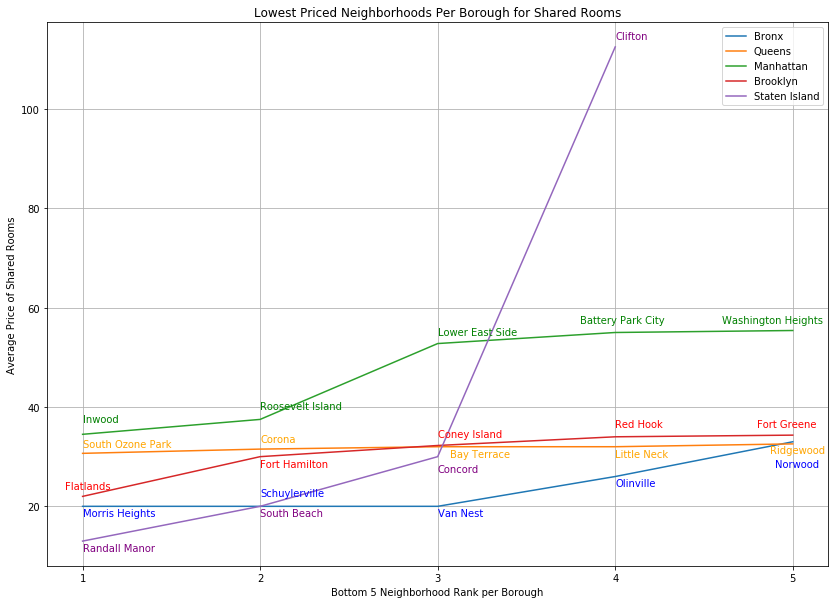

In [278]:
#Scatter plot for average price per property type for each of the Bottom 5 neighborhoods - by borough 
x_axis = [1,2,3,4,5]
plt.plot(x_axis, bronx_low_shared["price"][0:5], label="Bronx")
plt.plot(x_axis, queens_low_shared["price"][0:5], label="Queens")
plt.plot(x_axis, manhattan_low_shared["price"][0:5], label="Manhattan")
plt.plot(x_axis, brooklyn_low_shared["price"][0:5], label="Brooklyn")
plt.plot([1,2,3,4], staten_low_shared["price"][0:4], label="Staten Island")
xticks= [value for value in x_axis]
plt.legend()
plt.xticks(xticks)
plt.annotate('South Ozone Park', (1, 32), color = 'orange')
plt.annotate('Corona', (2, 33), color = 'orange')
plt.annotate('Bay Terrace', (3.07, 30), color = 'orange')
plt.annotate('Little Neck', (4, 30), color = 'orange')
plt.annotate('Ridgewood', (4.87, 30.7), color = 'orange')
plt.annotate('Inwood', (1, 37), color = 'green')
plt.annotate('Roosevelt Island', (2, 39.5), color = 'green')
plt.annotate('Lower East Side', (3, 54.5), color = 'green')
plt.annotate('Battery Park City', (3.8, 57), color = 'green')
plt.annotate('Washington Heights', (4.60, 57), color = 'green')
plt.annotate('Flatlands', (0.9, 23.5), color = 'red')
plt.annotate('Fort Hamilton', (2, 28), color = 'red')
plt.annotate('Coney Island', (3, 34), color = 'red')
plt.annotate('Red Hook', (4, 36), color = 'red')
plt.annotate('Fort Greene', (4.80, 36), color = 'red')
plt.annotate('Morris Heights', (1, 18), color = 'blue')
plt.annotate('Schuylerville', (2, 22), color = 'blue')
plt.annotate('Van Nest', (3, 18), color = 'blue')
plt.annotate('Olinville', (4, 24), color = 'blue')
plt.annotate('Norwood', (4.90, 28), color = 'blue')
plt.annotate('Randall Manor', (1, 11), color = 'purple')
plt.annotate('South Beach', (2, 18), color = 'purple')
plt.annotate('Concord', (3, 27), color = 'purple')
plt.annotate('Clifton', (4, 114), color = 'purple')
plt.ylabel("Average Price of Shared Rooms")
plt.xlabel("Bottom 5 Neighborhood Rank per Borough")
plt.title("Lowest Priced Neighborhoods Per Borough for Shared Rooms")
plt.grid()
plt.savefig(os.path.join(output_path, 'NYC_Borough_Neighborhood_Shared_Room_Lowest_Price.png'))
plt.show()

In [279]:
#In each borough, what are the 5 neighborhoods with the lowest average number of minimum nights?

minimum_nights_df = cleaned_data[["neighbourhood_group","neighbourhood", "minimum_nights" ]]
minimum_nights_grouped = minimum_nights_df.groupby(["neighbourhood_group", "neighbourhood"])
#finding the average of the number of minimum nights per borough, per neighborhood
minimum_nights = minimum_nights_grouped.mean()

#Per borough, dataframe is sorted by lowest amount of average number of minimum nights in each neighborhood
minimum_nights_sorted = minimum_nights.sort_values(['neighbourhood_group', "minimum_nights"], ascending = [True, True])

In [280]:
#find the 5 neighborhoods with the lowest minimum required nights PER BOROUGH
bronx_minimum_nights= minimum_nights_sorted.loc["Bronx"].head()

bronx_minimum_nights

,minimum_nights
neighbourhood,
East Morrisania,1.333333
Woodlawn,1.454545
North Riverdale,1.500000
Olinville,1.500000
West Farms,1.500000


In [281]:
staten_island_minimum_nights = minimum_nights_sorted.loc["Staten Island"].head()
staten_island_minimum_nights 

,minimum_nights
neighbourhood,
Bull's Head,1.000000
Oakwood,1.200000
New Dorp Beach,1.500000
New Springville,1.500000
Emerson Hill,1.666667


In [282]:
brooklyn_minimum_nights = minimum_nights_sorted.loc["Brooklyn"].head()
brooklyn_minimum_nights

,minimum_nights
neighbourhood,
Canarsie,2.237037
Mill Basin,2.250000
Bath Beach,2.600000
Flatlands,2.621212
Dyker Heights,2.636364


In [283]:
manhattan_minimum_nights = minimum_nights_sorted.loc["Manhattan"].head()
manhattan_minimum_nights

,minimum_nights
neighbourhood,
Marble Hill,2.300000
East Harlem,4.610817
Inwood,4.714286
Morningside Heights,4.797619
Civic Center,5.066667


In [284]:
queens_minimum_nights = minimum_nights_sorted.loc["Queens"].head()
queens_minimum_nights 

,minimum_nights
neighbourhood,
Breezy Point,1.000000
Fresh Meadows,1.366667
Whitestone,1.375000
Jamaica Hills,1.428571
East Elmhurst,1.491228


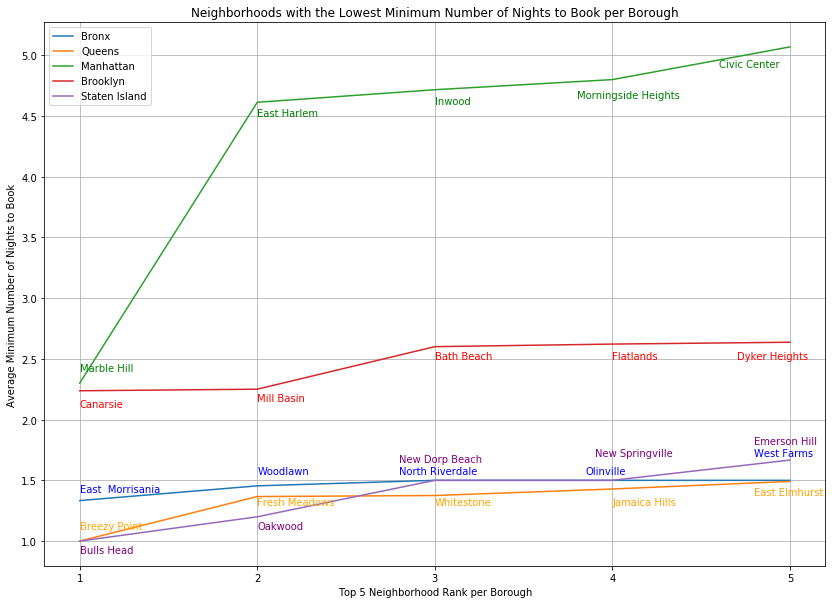

In [285]:
x_axis = [1,2,3,4,5]
xticks= [value for value in x_axis]
plt.plot(x_axis, bronx_minimum_nights, label="Bronx")
plt.plot(x_axis, queens_minimum_nights, label="Queens")
plt.plot(x_axis, manhattan_minimum_nights, label="Manhattan")
plt.plot(x_axis, brooklyn_minimum_nights, label="Brooklyn")
plt.plot(x_axis, staten_island_minimum_nights, label="Staten Island")
plt.legend()
plt.xticks(xticks)
plt.annotate('Breezy Point', (1, 1.1), color = 'orange')
plt.annotate('Fresh Meadows', (2, 1.3), color = 'orange')
plt.annotate('Whitestone', (3, 1.3), color = 'orange')
plt.annotate('Jamaica Hills', (4, 1.3), color = 'orange')
plt.annotate('East Elmhurst', (4.80, 1.38), color = 'orange')
plt.annotate('Marble Hill', (1, 2.4), color = 'green')
plt.annotate('East Harlem', (2, 4.5), color = 'green')
plt.annotate('Inwood', (3, 4.6), color = 'green')
plt.annotate('Morningside Heights', (3.8, 4.65), color = 'green')
plt.annotate('Civic Center', (4.60, 4.9), color = 'green')
plt.annotate('Canarsie', (1, 2.1), color = 'red')
plt.annotate('Mill Basin', (2, 2.15), color = 'red')
plt.annotate('Bath Beach', (3, 2.5), color = 'red')
plt.annotate('Flatlands', (4, 2.5), color = 'red')
plt.annotate('Dyker Heights', (4.70, 2.5), color = 'red')
plt.annotate('East  Morrisania', (1, 1.4), color = 'blue')
plt.annotate('Woodlawn', (2, 1.55), color = 'blue')
plt.annotate('North Riverdale', (2.80, 1.55), color = 'blue')
plt.annotate('Olinville', (3.85, 1.55), color = 'blue')
plt.annotate('West Farms', (4.80, 1.7), color = 'blue')
plt.annotate('Bulls Head', (1, 0.9), color = 'purple')
plt.annotate('Oakwood', (2, 1.1), color = 'purple')
plt.annotate('New Dorp Beach', (2.8, 1.65), color = 'purple')
plt.annotate('New Springville', (3.9, 1.7), color = 'purple')
plt.annotate('Emerson Hill', (4.8, 1.8), color = 'purple')
plt.ylabel("Average Minimum Number of Nights to Book")
plt.xlabel("Top 5 Neighborhood Rank per Borough")
plt.title("Neighborhoods with the Lowest Minimum Number of Nights to Book per Borough")
plt.grid()
plt.savefig(os.path.join(output_path, 'NYC_Borough_Neighborhood_Lowest_Minimum_Nights.png'))
plt.show()


# Project Observations, Trends, and Conclusions (Matt)

The purpose of this project was to analyze current calendar year data for Airbnb rentals in New York City (NYC), based on a dataset obtained from Kaggle. The Pandas, Numpy, and Matplotlib modules in Python were used to clean and process the data, as well as calculate certain metrics and generate meaningful plots. These visualizations allowed for certain observations and conclusions to be made about Airbnb properties in NYC.

Also discussed are thoughts regarding target audiences for this data, possibly including Airbnb corporate, current property hosts, prospective property hosts, prospective guests and competitors offering guest accommodations.

## New York City Level Analysis

The first level of the analysis involved reviewing the data for NYC as a whole. The cleaned dataset included information on nearly 39,000 properties and it was decided that two questions should be asked of the data.

1. What is the number and percentage of property types (entire home/apartment, private room, shared room) available?
2. How many unique hosts are there for each type of property?

For each of these questions, the cleaned data was grouped by the property type parameter and then the total counts were plotted in bar graphs to reveal the breakdowns.

ADD IMAGE 1 HERE

The above plot clearly shows that the available Airbnb properties in NYC are mostly entire homes/apartments or single rooms, with a slight edge toward the former. It will be interesting to see later what this distribution looks like for each of the five NYC boroughs, given certain distinctive characteristics. In contrast, shared rooms are extremely limited, which could be due to the nature of real estate properties in NYC. Most homes and apartments tend to be fairly small compared to those outside the five boroughs, which limits the size of the rooms they contain. Therefore, sharing a more confined space would likely be less desirable. Additionally, no matter the size of the room, privacy concerns probably limits demand for such properties. For these reasons, no further analysis will be discussed regarding shared rooms.

ADD IMAGE 2 HERE

The data regarding the number of unique hosts per property type shows a very similar trend to the property count graph. The entire home/apartment and private room category counts decreased by approximately 2,500 and 5,000 respectively. This indicated that the majority of hosts only have a single property available for listing, as the aforementioned decreases only account for roughly 12 and 28 percent of their respective total property counts. This is not surprising because NYC has a very high cost of living. Most individuals are likely Airbnb hosts because they are interested in offsetting mortgage/rent payments for their primary residence by renting out an empty room or making extra money by renting out their living space while out of town. Others hosts may live elsewhere but, due to the demand for NYC housing, have an additional property as a full-time rental unit for investment purposes.

Before finishing the analysis of the city level data, it is important to note its relevance to potential target audiences. 
Airbnb corporate could use the results from both graphs to not only compare the breakdown of properties in NYC to other similar cities where they have a presence, but also to identify whether they need to advertise for additional hosts for certain property types. 
This overall NYC data is less useful to current/prospective hosts and guests, as the more detailed borough and neighborhood data would most likely better suit their listing and booking needs. Additionally, Airbnb competitors for guest bookings (e.g. standard hotels, suite hotels, extended stay hotels) may be better served by the neighborhood data.

## New York City Borough Level Analysis

The second level of the analysis involved examining the data for each of the five NYC boroughs (Bronx, Brooklyn, Manhattan, Queens, Staten Island). This significantly divided the number of data points, which allowed for more detailed questions to be asked.

1. What is the number and percentage of property types available in each borough?
2. What is the average number of days available for booking for each type of property in each borough?
3. What is the average price for each type of property in each borough?
4. What is the average number of minimum nights for each type of property in each borough?

For each of these questions, the cleaned data was grouped by the borough and property type parameters. The next step was to perform mathematical operations on the appropriate columns of each group and generate the associated visualizations. These charts and graphs revealed interesting trends regarding how the makeup of NYC Airbnb properties varies across the boroughs.

ADD IMAGE 1 HERE (5 Pie Charts)

It is clear from the above pie charts that Brooklyn and Manhattan contain the vast majority of the NYC Airbnb properties, with roughly even total property counts. However, while Brooklyn has a near equal disribution of entire homes/apartments versus private rooms, Manhattan has over one and a half times the number of entire homes/apartments versus private rooms. This is likely due to the smaller size of homes/apartments in Manhattan, which limits them having extra available rooms. 

The data also shows that the smallest total concentration of properties exists in Staten Island and the Bronx. With limited transit links to the heart of NYC (Manhattan), it is understandable that Staten Island has an extremely small amount of listed properties. An explanation is less clear for the Bronx, as it has close proximity to and numerous public transit links with Manhattan. 

ADD IMAGE 2 HERE

The data regarding nights offered for booking shows that the two most likely sought after boroughs have the least offerings for the two more desirable property types. As Manhattan is the major business hub for and largest tourist attraction in NYC, it is reasonable to assume that demand would be high, while supply is low. With increased corporate investment and tourist traffic due to revitalization, Brooklyn also most likely would have an imbalance of supply versus demand.

In contrast to the above, while the Bronx and Staten Island have the least property counts, the average number of nights offered for booking per property is significantly higher. This possibly may partially address the supply versus demand imbalance.

ADD IMAGE 3 HERE

When it comes to the average price per property type in each borough, it is not surprising that Manhattan is the most expensive followed by Brooklyn for entire homes/apartments and private rooms. There is not a significant difference between the average prices for the aforementioned property types in the other three boroughs, though the average price for private rooms in Queens is nearly equal to that of Brooklyn. This possibly indicates that as demand surpasses supply in Brooklyn for private rooms,  there is more demand for private rooms in Queens.

ADD IMAGE 4 HERE

With more potential demand in Manhattan and Brooklyn due to their popularity, it is no surprise that the average minimum night requirement for entire homes/apartments is highest in these boroughs. Hosts can make higher profits by requiring more nights as guests may be willing to pay for more nights then they need, given the location within NYC. For example, properties in the aforementioned boroughs would be closer to desired destinations thus balancing the higher Airbnb costs with lower transportation costs, transit time, etc.

While the other three boroughs have generally lower minimum night requirements, there are exceptions. The entire home/apt category in the Bronx is nearly equal to that of Brooklyn, and the private room category in Queens is nearly equal that of both Manhattan and Brooklyn. The close proximity of these minimum stay requirements to each other could indicate that that the Bronx is next in demand for private homes/apartments after Brooklyn, and, for private rooms, Queens is the third favored choice.

Unlike the overall NYC data, this data could be useful for prospective/current hosts and guests. Prospective hosts may be able to use this data to identify whether to list their property in a specific borough, as well as to set the appropriate pricing and minimum night requirement. Similarly, current hosts could adjust their listing details based on this data. For guests visiting Manhattan and Brooklyn, it would be wise to balance the higher Airbnb price and lower transportation time/cost of staying nearby versus staying in one of the other three boroughs. Of course, they would need to do further research on the neighborhood, quality, and amenities of specific properties to fully understand the comparisons and big picture.

## New York City Borough's Neighborhood Level Analysis

The third level of analysis involved examining the data for specific subsets of neigborhoods within each borough based on certain criteria. This further divided the data, enabling questions to be asked based on neighborhood rankings.

1. In each borough, what are the five neighborhoods with the most reviews?
2. In each borough, what are the five neighborhoods with the highest property type counts?
3. In each borough, what are the five neighborhoods with the highest and lowest average prices for each property type?
4. In each borough, what are the five neighborhoods with the lowest average minimum night requirement?

For each of these questions, the cleaned data was grouped by the borough and neighborhood parameters, as well by property type for questions two and three. Mathematical operations were then performed on the appropriate columns in each group and several line graphs were generated to display results. These visualizations highlight certain neighborhood attributes according to the chosen criteria.

ADD IMAGE 1

Comparing the top five neighborhoods with the most reviews in each borough, it is interesting that Manhattan and Brooklyn, which have higher average prices, have the lowest average number of reviews. The other three boroughs, with lower prices, have more reviews on average. It is reasonable to conclude that business travelers, who are more likely to stay closer to the major business districts in Manhattan and Brooklyn, are less likely to write reviews. Additionally, any guests who pay higher average accommodation fees may tend to write less reviews. A limitation of this dataset is the lack of information about the overall categorization of the feedback, namely positive or negative.

Another interesting is trend the top five Manhattan neighborhoods have a roughly consistent number of reviews, while the number varies in the other boroughs. This could be due to a more even distribution of properties throughout Manhattan, while other boroughs may have distinct clusters of properties. 

ADD IMAGE 2 (3 Line Graph)

Examining the property type counts for the top five neighborhoods in each borough, there is an even distribution of entire homes/apartments in the Manhattan neighborhoods, but Brooklyn has the highest concentration of anywhere in NYC in just two neighborhoods. As for private rooms, Brooklyn far exceeds Manhattan with three neighborhoods ranking the highest in NYC, while Manhattan has only the fourth highest. Additionally, the property concentration in this Manhattan neighborhood far exceeds that of its other neighborhoods. A possible conclusion as to why the Brooklyn neighborhoods of Williamsburg, Bedford-Stuyvesant, and Bushwick have such a high concentration of Airbnb properties is that they are in close proximity to all three bridges connecting Brooklyn and Manhattan (Brooklyn, Manhattan, Williamsburg), and are priced on average lower than Manhattan properties of a similar type.

ADD IMAGE 3 (6 Line Graph)

Looking at the line graphs displaying the top five neighborhoods in each borough with the highest and lowest average prices for each property type, the data supported previous observations relating to Manhattan and Brooklyn. However, additional trends are present. 

As before, the popularity of Manhattan and Brooklyn was justified by the presence of the two most expensive neighborhoods for entire homes/apartments. Tribeca in Manhattan is no surprise because it is extremely close to financial district. Sea Gate in Brooklyn was most expensive, not because of proximity to Manhattan, but due to the fact it is a private residential waterfront community that appeals to guests who can afford it. Additionally, other than Sea Gate, three of Brooklyn's other top five neightborhoods are less expensive than certain neighborhoods in Queens and Staten Island. It can be assumed there are more desirable private homes in those areas. As for the lowest priced neighborhoods for entire homes/apartments, the four boroughs other than Manhattan have a roughly consistent set of average prices. Meanwhile, the Manhattan neighborhood of Marble Hill has the cheapest average price in the borough, but prices progressively rose beyond this neighborhood. This is understandable as Marble Hill is the northernmost neighborhood in Manhattan, and farthest from the business and tourist districts.

Unlike the private room property count data where Brooklyn led Manhattan, here Manhattan leads the way in highest average price for private rooms over Brooklyn. It is also interesting that Queens has higher prices than Brooklyn. Possible reasons for these trends are that the Manhattan neighborhoods are closer to business and/or tourist areas, and the Queens neighborhoods are either waterfront and/or private residential communities. As for the lowest average priced neighborhoods for private rooms, the price distribution is roughly equal for three boroughs, while Manhattan and Staten Island have a greater price spread. The latter has a single cheapest neighborhood and the average price then quickly doubles. It is likely this neighborhood is not as desirable to potential guests and the low price is a booking incentive.

ADD IMAGE 4

Examining the top five neighborhoods with the lowest average minimum night requirement, Manhattan and Brooklyn understandably have the highest required minimums. However, while the lowest minimum for both is the same, the Brooklyn data stays roughly consistent and the Manhattan minimum quickly rises before leveling off. This trend can probably be explained by the high demand to stay in neighborhoods in Manhattan.

Similar to the NYC borough level data, the neighborhood data can be useful in similar ways for prospective/current hosts and guests. For the latter, it is even more valuable because it identifies specific neighborhoods within larger boroughs that are most and least attractive based on price and the minimum stay requirement. However, since the review data doesn't include the overall nature of the review, it is of limited value to guests. Additionally, Airbnb competitors for guests bookings, such as various types of hotels, could use the neighborhood data to identify locations where they could be competitive. This would apply to existing properties as well as planning for upcoming properties.